#Imports

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from pandas.tseries.offsets import DateOffset

#ML imports

#models
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, ensemble
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


#metrics
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

#preprocessing
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Transportation/ Energy Consumption data load (Endogenous)

In [ ]:
URL = 'https://drive.google.com/file/d/1AweiJ2J3CGnuIlgfPFvNNGBP67IVkzJ3/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('t_EC.csv')


t_EC_df = pd.read_csv('t_EC.csv')
t_EC_df.drop(columns = ['Unnamed: 0'],inplace=True)
t_EC_df

,State,Year,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,Alabama,2010,0.001190,0.100059,0.844724,0.004080,0.008121,0.013246,0.028580,2595316.0,64165.14864,3805751.0,7720672.0,4653840.0,63577.0,2.10,77.40,18.20,2.90,132.80,32.20,2407359.000,4047.0,1813155.0,175470.1,4785514.0,57597.0,452756.0,375.0,0.0,117233.0,0.0,23015.0,224.0,9109.0,2972.0,317007.0,22575.0,224.0,5836.0,475331.0,475331.0,270504.0,1425204.0,774098.0,419277.0,1939211.0,405.2,56.5,161.8,87.6,99.3,0.0
1,Alabama,2011,0.001478,0.099343,0.848534,0.004776,0.008864,0.010831,0.026175,2538696.0,64914.37237,3798552.0,7586278.0,4811940.0,66922.0,2.00,74.60,18.60,2.30,129.80,32.30,2482759.000,4108.0,1813497.0,181929.9,4799642.0,58389.0,451108.0,352.0,0.0,123579.0,0.0,21752.0,233.0,10074.0,2874.0,307341.0,23664.0,233.0,6655.0,474771.0,474771.0,257067.0,1439306.0,804044.0,377607.0,1913489.0,398.7,53.6,167.5,78.7,98.9,0.0
2,Alabama,2012,0.001123,0.094800,0.852861,0.004108,0.009290,0.011964,0.025855,2521069.0,64959.17207,3827522.0,7818049.0,4844630.0,67233.0,1.80,67.00,20.70,1.80,123.10,31.80,2708215.000,4074.0,1828248.0,186553.9,4816632.0,64573.0,442864.0,336.0,0.0,119078.0,0.0,21086.0,221.0,9687.0,2619.0,304337.0,25951.0,221.0,6587.0,468816.0,468816.0,244919.0,1385221.0,835513.0,338290.0,1887539.0,391.9,50.8,173.5,70.2,97.3,0.0
3,Alabama,2013,0.000979,0.085340,0.863611,0.004836,0.009511,0.010489,0.025234,2519753.0,65046.48393,3859403.0,8377400.0,4787220.0,66192.0,1.80,64.70,20.40,2.20,120.70,31.60,2939491.000,3986.0,1845086.0,192166.5,4831586.0,66109.0,440386.0,256.0,0.0,117059.0,0.0,21684.0,200.0,8123.0,2733.0,306987.0,22718.0,200.0,5028.0,463104.0,463104.0,256750.0,1382711.0,850433.0,358238.0,1928525.0,399.1,53.1,176.0,74.1,95.8,0.0
4,Alabama,2014,0.001697,0.085645,0.858900,0.004123,0.009687,0.011438,0.028511,2576928.0,65666.60432,3881542.0,8898719.0,5366840.0,63170.0,1.90,65.60,21.60,2.40,123.10,31.60,2959205.000,4067.0,1863561.0,195037.7,4843737.0,67911.0,442877.0,284.0,0.0,118527.0,0.0,21870.0,161.0,8772.0,2823.0,306780.0,19577.0,161.0,5530.0,462453.0,462453.0,262497.0,1371219.0,861140.0,378853.0,1964943.0,405.7,54.2,177.8,78.2,95.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

#Ground level Ozone concentration data

In [ ]:




URL10 = 'https://drive.google.com/file/d/1jaMgkgyos62_r6MMPWw0QkyXZ_brazOS/view?usp=sharing'
path10 = URL10.split('/')[-2]
fileDownloaded10 = drive.CreateFile({'id': path10})
fileDownloaded10.GetContentFile('O3_2010.csv')

URL11 = 'https://drive.google.com/file/d/1DtBq496JY9GbksOlYKoVv2UiO_nt-bPv/view?usp=sharing'
path11 = URL11.split('/')[-2]
fileDownloaded11 = drive.CreateFile({'id': path11})
fileDownloaded11.GetContentFile('O3_2011.csv')

URL12 = 'https://drive.google.com/file/d/1qu9LGVjJlPo7NAbm9RfYZKEdqZwp6TCS/view?usp=sharing'
path12 = URL12.split('/')[-2]
fileDownloaded12 = drive.CreateFile({'id': path12})
fileDownloaded12.GetContentFile('O3_2012.csv')

URL13 = 'https://drive.google.com/file/d/178MyDFp0O5PFg5VaTFVkm4Ns2aR-XGi8/view?usp=sharing'
path13 = URL13.split('/')[-2]
fileDownloaded13 = drive.CreateFile({'id': path13})
fileDownloaded13.GetContentFile('O3_2013.csv')

URL14 = 'https://drive.google.com/file/d/1X0u4Nk2LaUiaMSdg8sYJmy9f7b9jLYu5/view?usp=sharing'
path14 = URL14.split('/')[-2]
fileDownloaded14 = drive.CreateFile({'id': path14})
fileDownloaded14.GetContentFile('O3_2014.csv')

URL15 = 'https://drive.google.com/file/d/14qp3R0g7BGWE84c96EWVYR--4-Xvkd7c/view?usp=sharing'
path15 = URL15.split('/')[-2]
fileDownloaded15 = drive.CreateFile({'id': path15})
fileDownloaded15.GetContentFile('O3_2015.csv')

URL16 = 'https://drive.google.com/file/d/1oFMmHnCgXRFFHndgPTviWxmh1x8bEu86/view?usp=sharing'
path16 = URL16.split('/')[-2]
fileDownloaded16 = drive.CreateFile({'id': path16})
fileDownloaded16.GetContentFile('O3_2016.csv')

URL17 = 'https://drive.google.com/file/d/10E2hwkn20Zi3yNy7or1D9yqve6rpfl-5/view?usp=sharing'
path17 = URL17.split('/')[-2]
fileDownloaded17 = drive.CreateFile({'id': path17})
fileDownloaded17.GetContentFile('O3_2017.csv')

URL18 = 'https://drive.google.com/file/d/1x1zgDmqoeDqO391pT21b2_lF4OuxHl80/view?usp=sharing'
path18 = URL18.split('/')[-2]
fileDownloaded18 = drive.CreateFile({'id': path18})
fileDownloaded18.GetContentFile('O3_2018.csv')

In [ ]:
#Read in the imported CSV files

O3_2010 = pd.read_csv('O3_2010.csv')
O3_2011 = pd.read_csv('O3_2011.csv')
O3_2012 = pd.read_csv('O3_2012.csv')
O3_2013 = pd.read_csv('O3_2013.csv')
O3_2014 = pd.read_csv('O3_2014.csv')
O3_2015 = pd.read_csv('O3_2015.csv')
O3_2016 = pd.read_csv('O3_2016.csv')
O3_2017 = pd.read_csv('O3_2017.csv')
O3_2018 = pd.read_csv('O3_2018.csv')

#combining all years into a single df
O3_df = pd.concat([ O3_2010,  O3_2011, O3_2012, O3_2013, O3_2014, O3_2015, O3_2016, O3_2017, O3_2018], ignore_index=True)

dates = list(O3_df['Date Local'])
year_ls = []
for i in range(len(dates)): 
    year = dates[i].split('-')[0]
    year_ls.append(year)

col_values = pd.Series(year_ls)
O3_df.insert(loc=12, column='Year', value=col_values)

O3_df['Date Local'] = pd.to_datetime(O3_df['Date Local'])

O3_df['Date'] = O3_df['Date Local']
O3_df['O3 Daily Mean'] = O3_df['Arithmetic Mean']
O3_df['O3 Daily Max'] = O3_df['1st Max Value']
O3_df['State'] = O3_df['State Name']
O3_df['Date'] = pd.to_datetime(O3_df['Date'])
O3_df.drop(['Date Local', 'Arithmetic Mean', '1st Max Value', 'State Name'], axis=1, inplace=True)



O3_df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Year,Units of Measure,Event Type,Observation Count,Observation Percent,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,County Name,City Name,CBSA Name,Date of Last Change,Date,O3 Daily Mean,O3 Daily Max,State
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2010,Parts per million,None,10,59.0,14,43,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2010-03-01,0.043500,0.046,Alabama
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2010,Parts per million,None,17,100.0,22,27,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2010-03-02,0.027471,0.029,Alabama
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2010,Parts per million,None,17,100.0,10,40,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2010-03-03,0.037765,0.043,Alabama
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2010,Parts per million,None,17,100.0,10,44,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2010-03-04,0.030353,0.047,Alabama
4,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2010,Parts per million,None,17,100.0,10,44,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2018-07-18,2010-03-05,0.034059,0.048,Alabama


In [ ]:

O3_slim = O3_df.drop(columns = [*O3_df.columns[:5],*O3_df.columns[7:11],*O3_df.columns[12:-9]])
O3_slim.drop(columns = ['City Name', 'CBSA Name', 'Date of Last Change'],inplace = True)


#O3_slim = O3_df[['State', 'Year','Date', 'County Name' ,'Address', 'Latitude', 'Longitude', 
                   #'Event Type', 'O3 Daily Mean', 'O3 Daily Max', 'AQI', 'City Name']]

O3_slim

,Latitude,Longitude,Year,Address,County Name,Date,O3 Daily Mean,O3 Daily Max,State
0,30.497478,-87.880258,2010,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,2010-03-01,0.043500,0.046,Alabama
1,30.497478,-87.880258,2010,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,2010-03-02,0.027471,0.029,Alabama
2,30.497478,-87.880258,2010,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,2010-03-03,0.037765,0.043,Alabama
3,30.497478,-87.880258,2010,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,2010-03-04,0.030353,0.047,Alabama
4,30.497478,-87.880258,2010,"FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Baldwin,2010-03-05,0.034059,0.048,Alabama
...,...,...,...,...,...,...,...,...,...
3515755,32.466389,-114.768611,2018,Calle 15 & Venustiano Carranza Water Well #10,SONORA,2018-12-27,0.027706,0.036,Country Of Mexico
3515756,32.466389,-114.768611,2018,Calle 15 & Venustiano Carranza Water Well #10,SONORA,2018-12-28,0.025529,0.037,Country Of Mexico
3515757,32.466389,-114.768611,2018,Calle 15 & Venustiano Carranza Water Well #10,SONORA,2018-12-29,0.024000,0.038,Country Of Mexico
3515758,32.466389,-114.768611,2018,Calle 15 & Venustiano Carranza Water Well #10,SONORA,2018-12-30,0.026824,0.037,Country Of Mexico


#Visualizing O3 concentration by monitoring site (2010-2018)

In [ ]:
State_df = O3_slim[O3_slim['State'] == 'Pennsylvania']
#city_df = State_df[State_df['City Name']== 'Orlando']
#county_df = State_df[State_df['County Name']== 'Los Angeles']
#city_df
set(State_df['Address'])

{" 255 LOWER BROADWAY(NEXT TO LEON&EDDY'S)",
 '1015 SEBRING ROAD',
 '1059 Arnold Road',
 '10TH AND MARNE STREETS',
 '125 Birch Road',
 '1366 Tadpole Rd, Pennsylvania Furnace, PA 16865',
 '1500 Pacific Ave, Natrona Heights, PA 15065 (Harrison)',
 '1501 E. LYCOMING AVE.',
 '17TH AND SPRING GARDEN STREETS',
 '220 Meddings Road',
 '2650 Delta Road',
 '2ND AVE & 7TH ST',
 '3000 LEWIS ST. (NEAR BATH ST.) Philadelphia, PA. 19137',
 '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)',
 '3545 W. Newport Road',
 '3640 Old Oakdale Rd, McDonald, PA 15057 (South Fayette)',
 '4.8 KM SE OF HOLBROOK',
 '5200 PENNYPACK PARK PHILADELPHIA, PA. 19136',
 '651 Gibson Blvd., Harrisburg, PA 17104',
 '747 Winding Rd, Biglerville, PA 17307',
 '899 CHERRY STREET',
 'ABRAHAM LINCOLN JR HIGH GROFFTOWN RD',
 'CALIFORNIA & 11TH AVE, HARRISON',
 'CARNEGIE SCIENCE CENTER - 1 ALLEGHENY RD',
 'CHARLER01 WASTE TREATMENT PLANT',
 'CHILWICK & WASHINGTON STS',
 'CROTON ST & JEFFERSON ST.',
 'DONOHOE ROAD - PENN DOT MAINT DI

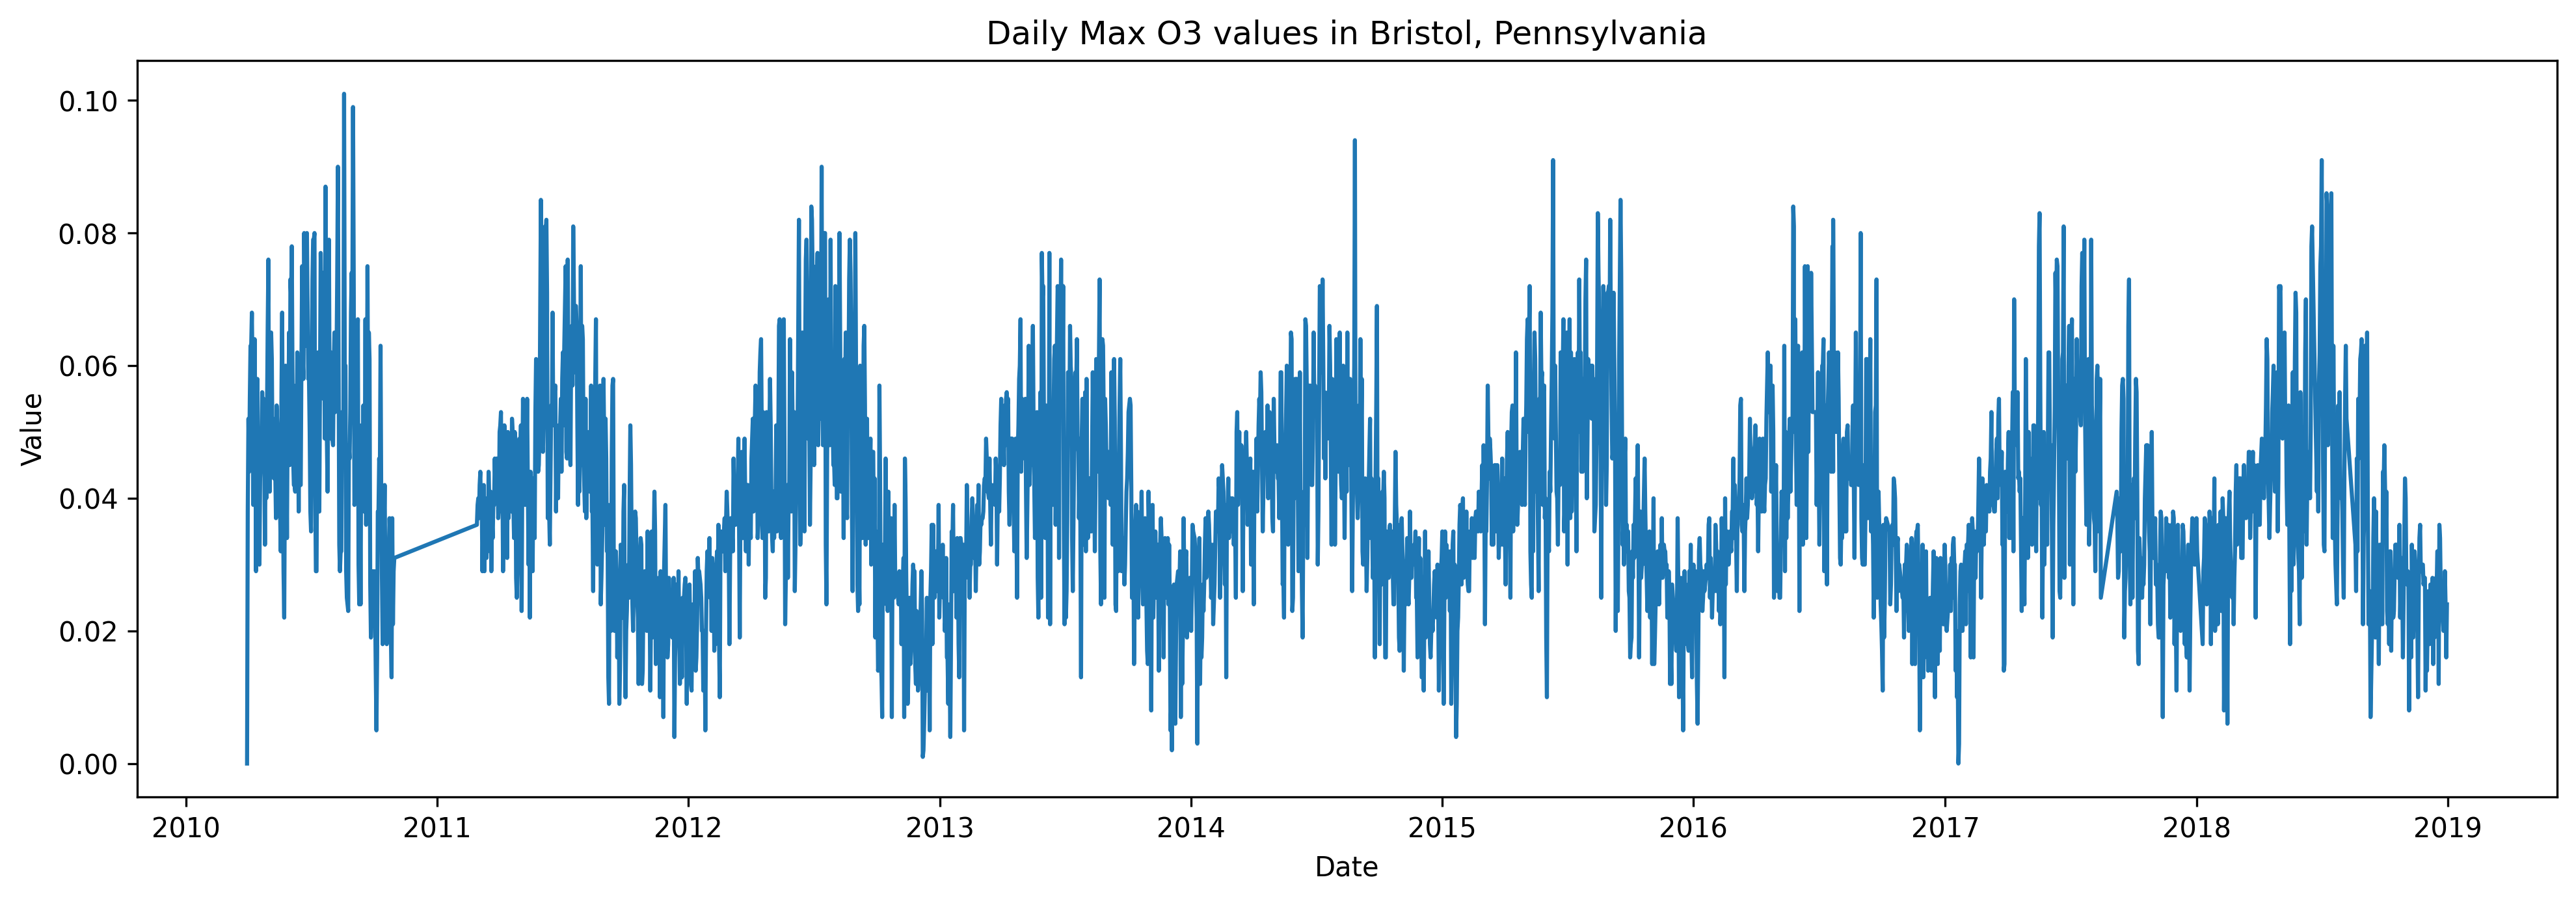

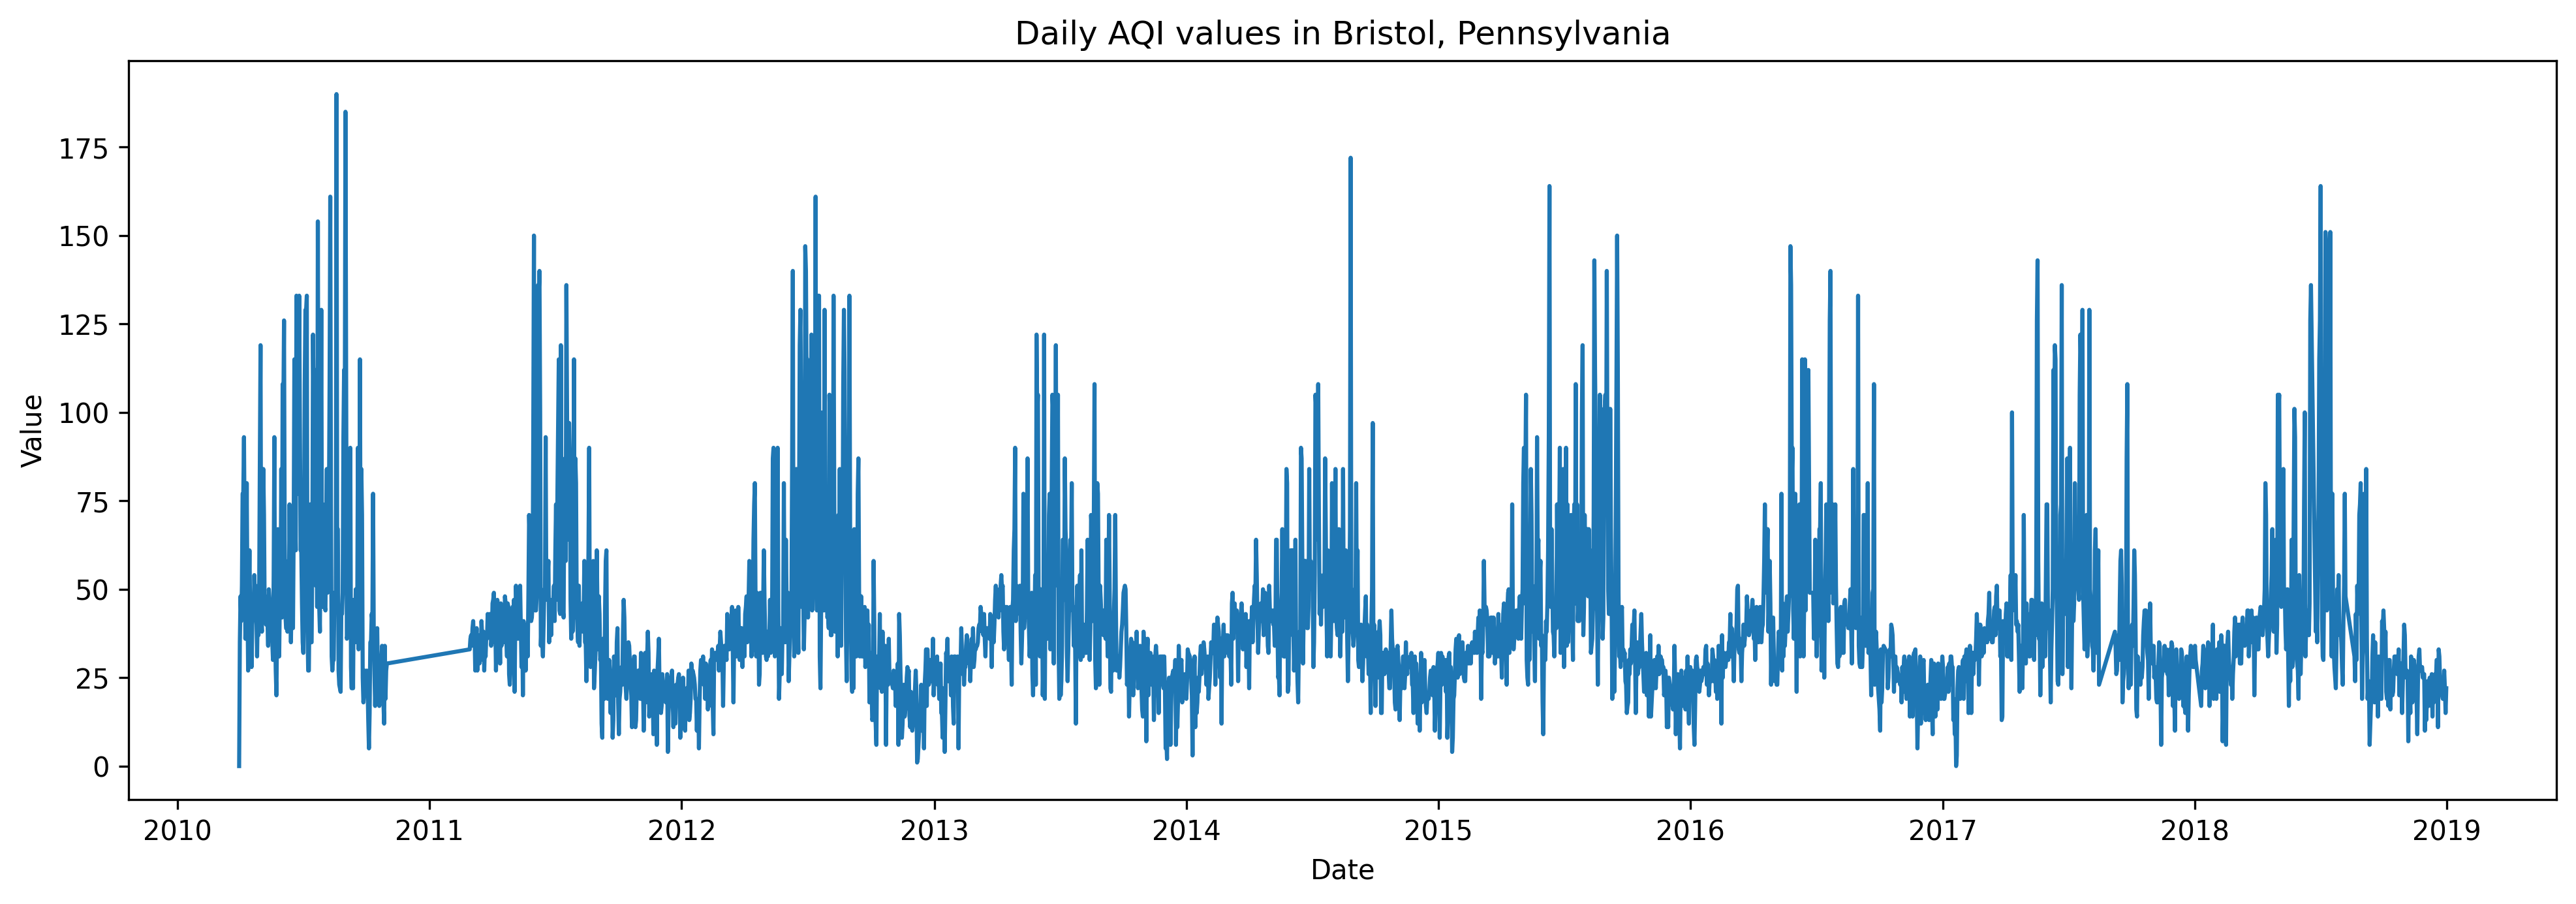

In [ ]:
#WY addresses: NCore - North Cheyenne Soccer Complex
#CO addresses: 2105 BROADWAY; 101 BANKS PL.; 3174 E. 78TH AVE.;
#PIT addresses: HILLMAN STATE PARK - KINGS CREEK ROAD; 301 39th St, Pittsburgh, PA 15201 (Lawrenceville);  PA. DEPT. OF TRANSPORTATION - RT.403 - Strongstown; 
#PIT addresses: CROTON ST & JEFFERSON ST.; (New Castle); Maurice K Goddard State Park, Sandy Lake, PA 16145; 10TH AND MARNE STREETS; (eerie); MILLER AUTO SHOP 1 MESSENGER ST; (Johnstown)
#PHL addresses: ROCKVIEW LANE; (Bristol); CHILWICK & WASHINGTON STS; (Wilkes-Barre); 1501 E. LYCOMING AVE.; GRANT-ASHTON ROADS PHILA NE AIRPORT;
#FL addresses (Orlando): 7055 WINEGARD RD., ORLANDO; 8706 W Irlo Bronson Memorial Hwy (SR 192), Kissimmee, FL 34747; 
#FL addresses (Tampa): 5121 Gandy Blvd, Tampa, FL 33611; 2435 SHARKEY RD.CLEARWATER; 7200-22 Avenue N., St. Petersburg, FL 33710;
#CA addresses: 1630 N MAIN ST, LOS ANGELES; 803 N. LOREN AVE., AZUSA; VA HOSPITAL, WEST LOS ANGELES; 924 N. GAREY AVE., POMONA
#AZ addresses: 




Address_df = State_df[State_df['Address']== 'ROCKVIEW LANE']
#Address_df.dtypes


#Address_df.head()

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=300):
    city = list(df['City Name'])[0]
    state = ', '+list(df['State'])[0]
    plt.figure(figsize=(16,5), dpi=dpi)
   
    plt.plot(x, y, color= 'tab:blue')
    plt.gca().set(title=title+city+state , xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(Address_df, x=Address_df['Date'], y= Address_df['O3 Daily Max'], title='Daily Max O3 values in ' )
plot_df(Address_df, x=Address_df['Date'], y= Address_df['AQI'], title='Daily AQI values in ' )

In [ ]:
Address_df

,State,Year,Date,County Name,Address,Latitude,Longitude,Event Type,O3 Daily Mean,O3 Daily Max,AQI,City Name
39077,California,2010,2010-01-01,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.009706,0.024,22,Los Angeles
39078,California,2010,2010-01-02,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.008824,0.022,20,Los Angeles
39079,California,2010,2010-01-03,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.012118,0.030,28,Los Angeles
39080,California,2010,2010-01-04,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.006118,0.015,14,Los Angeles
39081,California,2010,2010-01-05,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.006882,0.016,15,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...
3153265,California,2018,2018-12-27,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.026294,0.031,29,Los Angeles
3153266,California,2018,2018-12-28,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.016824,0.035,32,Los Angeles
3153267,California,2018,2018-12-29,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.010706,0.025,23,Los Angeles
3153268,California,2018,2018-12-30,Los Angeles,"1630 N MAIN ST, LOS ANGELES",34.06659,-118.22688,None,0.011529,0.025,23,Los Angeles


#LA meteo data processing

In [ ]:
#LA
URL = 'https://drive.google.com/file/d/1v9LB6Tlb5syiPHmL-UBDJLu3nreHFjzc/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2010.csv')

URL = 'https://drive.google.com/file/d/1DAeTC1rvD82ZsLD0Azyf0rPUS7F7Sz-x/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2011.csv')

URL = 'https://drive.google.com/file/d/1RpfrWLqp77ejPRWTAVD_x3MLwtr7RauD/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2012.csv')

URL = 'https://drive.google.com/file/d/1MdVeacYKR9Dj54jh9CKAIVZ-IJDs1xjt/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2013.csv')

URL = 'https://drive.google.com/file/d/1gm1kMWmi5SeS8QpgdKGfqG07n9zLE6If/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2014.csv')

URL = 'https://drive.google.com/file/d/1GqBHYtxgaSqs7d3FfCVn0gmTfLAukIGH/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2015.csv')

URL = 'https://drive.google.com/file/d/1JIyScw2-X64JAjXtIQgFkwZTsG8HoO_h/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2016.csv')

URL = 'https://drive.google.com/file/d/1JRpr70t0-CJSxwyDups7gZMNVxY11ya0/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2017.csv')

URL = 'https://drive.google.com/file/d/1GUfnxVpioVl3XtzRF4AfHrmyeFeLklkI/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_2018.csv')

In [ ]:
#tuc prefix is used on df's for convenience, at the end we distinguish which city this meteo data belongs to
tuc_2010 = pd.read_csv("LA_2010.csv", sep=',', skiprows = 6)

dates = tuc_2010['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2010.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2010.insert(loc=2, column='Year', value= year_vals)

tuc_2010.drop(columns=['Date_Time'], inplace=True)
tuc_2010 = tuc_2010[tuc_2010['Year']=='2010']
tuc_2010
###

tuc_2011 = pd.read_csv("LA_2011.csv", sep=',', skiprows = 6)

dates = tuc_2011['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2011.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2011.insert(loc=2, column='Year', value= year_vals)

tuc_2011.drop(columns=['Date_Time'], inplace=True)
tuc_2011 = tuc_2011[tuc_2011['Year']=='2011']

####
tuc_2012 = pd.read_csv("LA_2012.csv", sep=',', skiprows = 6)

dates = tuc_2012['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2012.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2012.insert(loc=2, column='Year', value= year_vals)

tuc_2012.drop(columns=['Date_Time'], inplace=True)
tuc_2012 = tuc_2012[tuc_2012['Year']=='2012']
###
tuc_2013 = pd.read_csv("LA_2013.csv", sep=',', skiprows = 6)

dates = tuc_2013['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2013.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2013.insert(loc=2, column='Year', value= year_vals)

tuc_2013.drop(columns=['Date_Time'], inplace=True)
tuc_2013 = tuc_2013[tuc_2013['Year']=='2013']
###
tuc_2014 = pd.read_csv("LA_2014.csv", sep=',', skiprows = 6)

dates = tuc_2014['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2014.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2014.insert(loc=2, column='Year', value= year_vals)

tuc_2014.drop(columns=['Date_Time'], inplace=True)
tuc_2014 = tuc_2014[tuc_2014['Year']=='2014']
###
tuc_2015 = pd.read_csv("LA_2015.csv", sep=',', skiprows = 6)

dates = tuc_2015['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2015.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2015.insert(loc=2, column='Year', value= year_vals)

tuc_2015.drop(columns=['Date_Time'], inplace=True)
tuc_2015 = tuc_2015[tuc_2015['Year']=='2015']
###
tuc_2016 = pd.read_csv("LA_2016.csv", sep=',', skiprows = 6)

dates = tuc_2016['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2016.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2016.insert(loc=2, column='Year', value= year_vals)

tuc_2016.drop(columns=['Date_Time'], inplace=True)
tuc_2016 = tuc_2016[tuc_2016['Year']=='2016']
####
tuc_2017 = pd.read_csv("LA_2017.csv", sep=',', skiprows = 6)

dates = tuc_2017['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2017.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2017.insert(loc=2, column='Year', value= year_vals)

tuc_2017.drop(columns=['Date_Time'], inplace=True)
tuc_2017 = tuc_2017[tuc_2017['Year']=='2017']
###
tuc_2018 = pd.read_csv("LA_2018.csv", sep=',', skiprows = 6)

dates = tuc_2018['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2018.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2018.insert(loc=2, column='Year', value= year_vals)

tuc_2018.drop(columns=['Date_Time'], inplace=True)
tuc_2018 = tuc_2018[tuc_2018['Year']=='2018']



LA_met_df = pd.concat([tuc_2010,tuc_2011,tuc_2012,tuc_2013,tuc_2014,tuc_2015,tuc_2016,tuc_2017,
                      tuc_2018],ignore_index=True)

LA_met_df.columns = ['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Visibility']

LA_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KEMT,01/01/2010,2010,NaN,NaN,0.0,50.0
1,KEMT,01/01/2010,2010,NaN,NaN,0.0,50.0
2,KEMT,01/01/2010,2010,NaN,NaN,0.0,30.0
3,KEMT,01/01/2010,2010,NaN,NaN,0.0,30.0
4,KEMT,01/01/2010,2010,NaN,NaN,0.0,30.0
...,...,...,...,...,...,...,...
39845,KEMT,12/31/2018,2018,60.8,23.22,10.36,10.0
39846,KEMT,12/31/2018,2018,59.0,14.32,10.36,10.0
39847,KEMT,12/31/2018,2018,55.4,13.86,5.75,10.0
39848,KEMT,12/31/2018,2018,55.4,12.76,5.75,10.0


In [ ]:
#conversion of dtypes
LA_met_df['Date'] = pd.to_datetime(LA_met_df['Date'])
LA_met_df['Year'] = LA_met_df['Year'].astype('int')
LA_met_df['Temperature (F)'] = LA_met_df['Temperature (F)'].astype('float')
LA_met_df['Relative Humidity'] = LA_met_df['Relative Humidity'].astype('float')
LA_met_df['Wind Speed'] = LA_met_df['Wind Speed'].astype('float')

LA_met_df['Visibility'] = LA_met_df['Visibility'].astype('float')
LA_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
grouped = LA_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = LA_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = LA_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
LA_df = df.merge(min_df, on = ['Date'])
LA_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,NaN,NaN,5.75,50.0,NaN,NaN,0.479167,27.666667,NaN,NaN,0.0,13.0
1,2010-01-02,NaN,NaN,8.05,50.0,NaN,NaN,3.810769,39.230769,NaN,NaN,0.0,30.0
2,2010-01-03,NaN,NaN,11.50,50.0,NaN,NaN,5.221538,39.230769,NaN,NaN,0.0,30.0
3,2010-01-04,NaN,NaN,10.36,50.0,NaN,NaN,4.071538,37.923077,NaN,NaN,0.0,13.0
4,2010-01-05,NaN,NaN,9.22,40.0,NaN,NaN,2.745385,24.230769,NaN,NaN,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,2018-12-27,64.4,70.88,12.66,10.0,57.380000,47.093000,5.870000,10.000000,48.2,22.06,0.0,10.0
3278,2018-12-28,60.8,31.54,12.66,10.0,55.400000,20.321667,7.191667,10.000000,48.2,14.56,0.0,10.0
3279,2018-12-29,62.6,69.43,5.75,10.0,53.876923,29.824615,1.818333,10.000000,35.6,15.76,0.0,10.0
3280,2018-12-30,64.4,71.66,8.05,10.0,56.230769,50.188462,1.942308,10.000000,39.2,31.88,0.0,10.0


##Merging Weather, O3, and endogenous data

In [ ]:

Address_df = O3_slim[O3_slim['Address']== '1630 N MAIN ST, LOS ANGELES']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'O3 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)


prior['Date'] = prior['Offset Date']
prior['O3 Daily Max 2 days prior'] = prior['O3 Daily Max']
prior.drop(columns=['Offset Date', 'O3 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])





O3_LA_df = Address_df.merge(LA_df, on = ['Date'])



In [ ]:
O3_LA_df['Year'] = O3_LA_df['Year'].astype('int')
final_LA_df = O3_LA_df.merge(t_EC_df, on = ['State', 'Year'])
final_LA_df.head(4)

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-01-03,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.012118,0.030,California,0.024,NaN,NaN,11.50,50.0,NaN,NaN,5.221538,39.230769,NaN,NaN,0.0,30.0,0.01005,0.115036,0.731725,0.051525,0.012897,0.026994,0.051773,14555037.0,322849.3982,23753441.0,1.403504e+09,31014130.0,11226636.0,16.1,43.5,63.6,28.9,361.0,208.9,24997352.0,20159.0,14414461.0,1973511.9,37319550.0,510879.0,2908071.0,1757.0,0.0,429426.0,2802.0,125153.0,724.0,440771.0,15459.0,1769073.0,23814.0,724.0,250861.0,2934687.0,2940041.0,1510438.0,1731784.0,1739572.0,1466657.0,7656711.0,205.2,40.5,46.6,39.3,78.8,5354.0
1,2010-01-04,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.006118,0.015,California,0.022,NaN,NaN,10.36,50.0,NaN,NaN,4.071538,37.923077,NaN,NaN,0.0,13.0,0.01005,0.115036,0.731725,0.051525,0.012897,0.026994,0.051773,14555037.0,322849.3982,23753441.0,1.403504e+09,31014130.0,11226636.0,16.1,43.5,63.6,28.9,361.0,208.9,24997352.0,20159.0,14414461.0,1973511.9,37319550.0,510879.0,2908071.0,1757.0,0.0,429426.0,2802.0,125153.0,724.0,440771.0,15459.0,1769073.0,23814.0,724.0,250861.0,2934687.0,2940041.0,1510438.0,1731784.0,1739572.0,1466657.0,7656711.0,205.2,40.5,46.6,39.3,78.8,5354.0
2,2010-01-05,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.006882,0.016,California,0.030,NaN,NaN,9.22,40.0,NaN,NaN,2.745385,24.230769,NaN,NaN,0.0,15.0,0.01005,0.115036,0.731725,0.051525,0.012897,0.026994,0.051773,14555037.0,322849.3982,23753441.0,1.403504e+09,31014130.0,11226636.0,16.1,43.5,63.6,28.9,361.0,208.9,24997352.0,20159.0,14414461.0,1973511.9,37319550.0,510879.0,2908071.0,1757.0,0.0,429426.0,2802.0,125153.0,724.0,440771.0,15459.0,1769073.0,23814.0,724.0,250861.0,2934687.0,2940041.0,1510438.0,1731784.0,1739572.0,1466657.0,7656711.0,205.2,40.5,46.6,39.3,78.8,5354.0
3,2010-01-06,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.003824

##Adding Geographical Features

In [ ]:


Address_df1 = O3_slim[O3_slim['Address']==  '803 N. LOREN AVE., AZUSA']
Address_df2 = O3_slim[O3_slim['Address']== '924 N. GAREY AVE., POMONA']



offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)


datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)


neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'O3 Daily Max_x', 'O3 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-01-03,0.030,0.030
1,2010-01-04,0.035,0.028
2,2010-01-05,0.035,0.028
3,2010-01-06,0.030,0.013
4,2010-01-07,0.027,0.019
...,...,...,...
3191,2018-12-29,0.042,0.022
3192,2018-12-30,0.040,0.033
3193,2018-12-31,0.035,0.028
3194,2019-01-01,0.033,0.026


In [ ]:
LA_geo_df = final_LA_df.merge(geo_df, how = 'inner', on= ['Date'])
LA_geo_df

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-01-03,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.012118,0.030,California,0.024,NaN,NaN,11.50,50.0,NaN,NaN,5.221538,39.230769,NaN,NaN,0.0,30.0,0.010050,0.115036,0.731725,0.051525,0.012897,0.026994,0.051773,14555037.0,322849.3982,23753441.0,1.403504e+09,31014130.0,11226636.0,16.10,43.50,63.60,28.90,361.00,208.90,24997352.00,20159.0,14414461.0,1973511.9,37319550.0,510879.0,2908071.0,1757.0,0.0,429426.0,2802.0,125153.0,724.0,440771.0,15459.0,1769073.0,23814.0,724.0,250861.0,2934687.0,2940041.0,1510438.0,1731784.0,1739572.0,1466657.0,7656711.0,205.2,40.5,46.6,39.3,78.8,5354.0,0.030,0.030
1,2010-01-04,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.006118,0.015,California,0.022,NaN,NaN,10.36,50.0,NaN,NaN,4.071538,37.923077,NaN,NaN,0.0,13.0,0.010050,0.115036,0.731725,0.051525,0.012897,0.026994,0.051773,14555037.0,322849.3982,23753441.0,1.403504e+09,31014130.0,11226636.0,16.10,43.50,63.60,28.90,361.00,208.90,24997352.00,20159.0,14414461.0,1973511.9,37319550.0,510879.0,2908071.0,1757.0,0.0,429426.0,2802.0,125153.0,724.0,440771.0,15459.0,1769073.0,23814.0,724.0,250861.0,2934687.0,2940041.0,1510438.0,1731784.0,1739572.0,1466657.0,7656711.0,205.2,40.5,46.6,39.3,78.8,5354.0,0.035,0.028
2,2010-01-05,34.06659,-118.22688,2010,"1630 N MAIN ST, LOS ANGELES",Los Angeles,0.006882,0.016,California,0.030,NaN,NaN,9.22,40.0,NaN,NaN,2.745385,24.230769,NaN,NaN,0.0,15.0,0.010050,0.115036,0.731725,0.051525,0.012897,0.026994,0.051773,14555037.0,322849.3982,23753441.0,1.403504e+09,31014130.0,11226636.0,16.10,43.50,63.60,28.90,361.00,208.90,24997352.00,20159.0,14414461.0,1973511.9,37319550.0,510879.0,2908071.0,1757.0,0.0,429426.0,2802.0,125153.0,724.0,440771.0,15459.0,1769073.0,23814.0,724.0,250861.0,2934687.0,2940041.0,1510438.0,1731784.0,1739572.0,146

In [ ]:
for col in LA_geo_df.columns:
    if LA_geo_df[col].isnull().sum()>0:
        print(col+ ":", LA_geo_df[col].isnull().sum())

Max Daily Temperature: 807
Max Daily Humidity: 815
Max Daily Wind Speed: 1
Max Daily Visibility: 4
Mean Daily Temperature: 807
Mean Daily Humidity: 815
Mean Daily Wind Speed: 1
Mean Daily Visibility: 4
Min Daily Temperature: 807
Min Daily Humidity: 815
Min Daily Wind Speed: 1
Min Daily Visibility: 4


In [ ]:
LA_geo_df.dropna(inplace=True)
#Saving LA geo df
final_LA_csv = LA_geo_df.to_csv("la_geo_csv",index=True )

#Tampa meteo data processing

In [ ]:
#Tampa
URL = 'https://drive.google.com/file/d/1WssqHJWJRZcHil3tFaESXDTMN7IKmD9z/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2010.csv')

URL = 'https://drive.google.com/file/d/1AYjywG7wkY21UWtWSKgPQpECXh5cAyS4/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2011.csv')

URL = 'https://drive.google.com/file/d/1KTpehGi8zeDtmLaXLqOklTWDCzUfLsoc/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2012.csv')

URL = 'https://drive.google.com/file/d/1RDsqG7W-8MmBa7W5RGie7otP8_nkF_wP/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2013.csv')

URL = 'https://drive.google.com/file/d/1B6vrphHaW5GwnQ5xue-c4ZhUMeWPX6ir/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2014.csv')

URL = 'https://drive.google.com/file/d/189tYC_MxNXHnEr6QUP5YeJOSBFvG7K5H/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2015.csv')

URL = 'https://drive.google.com/file/d/1nFjk9Mu6x2Tys0LXjcLYFQlaYTLjyPPK/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2016.csv')

URL = 'https://drive.google.com/file/d/1Ou32A5RX2gCqwNrwBSc4aPPojCb_9ArO/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2017.csv')

URL = 'https://drive.google.com/file/d/1VGII0EZj_eVgOwfPKapO3jpao9rSKay3/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_2018.csv')

In [ ]:
#tuc prefix is used on df's for convenience, at the end we distinguish which city this meteo data belongs to
tuc_2010 = pd.read_csv("TP_2010.csv", sep=',', skiprows = 6)

dates = tuc_2010['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2010.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2010.insert(loc=2, column='Year', value= year_vals)

tuc_2010.drop(columns=['Date_Time'], inplace=True)
tuc_2010 = tuc_2010[tuc_2010['Year']=='2010']
tuc_2010
###

tuc_2011 = pd.read_csv("TP_2011.csv", sep=',', skiprows = 6)

dates = tuc_2011['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2011.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2011.insert(loc=2, column='Year', value= year_vals)

tuc_2011.drop(columns=['Date_Time'], inplace=True)
tuc_2011 = tuc_2011[tuc_2011['Year']=='2011']

####
tuc_2012 = pd.read_csv("TP_2012.csv", sep=',', skiprows = 6)

dates = tuc_2012['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2012.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2012.insert(loc=2, column='Year', value= year_vals)

tuc_2012.drop(columns=['Date_Time'], inplace=True)
tuc_2012 = tuc_2012[tuc_2012['Year']=='2012']
###
tuc_2013 = pd.read_csv("TP_2013.csv", sep=',', skiprows = 6)

dates = tuc_2013['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2013.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2013.insert(loc=2, column='Year', value= year_vals)

tuc_2013.drop(columns=['Date_Time'], inplace=True)
tuc_2013 = tuc_2013[tuc_2013['Year']=='2013']
###
tuc_2014 = pd.read_csv("TP_2014.csv", sep=',', skiprows = 6)

dates = tuc_2014['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2014.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2014.insert(loc=2, column='Year', value= year_vals)

tuc_2014.drop(columns=['Date_Time'], inplace=True)
tuc_2014 = tuc_2014[tuc_2014['Year']=='2014']
###
tuc_2015 = pd.read_csv("TP_2015.csv", sep=',', skiprows = 6)

dates = tuc_2015['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2015.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2015.insert(loc=2, column='Year', value= year_vals)

tuc_2015.drop(columns=['Date_Time'], inplace=True)
tuc_2015 = tuc_2015[tuc_2015['Year']=='2015']
###
tuc_2016 = pd.read_csv("TP_2016.csv", sep=',', skiprows = 6)

dates = tuc_2016['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2016.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2016.insert(loc=2, column='Year', value= year_vals)

tuc_2016.drop(columns=['Date_Time'], inplace=True)
tuc_2016 = tuc_2016[tuc_2016['Year']=='2016']
####
tuc_2017 = pd.read_csv("TP_2017.csv", sep=',', skiprows = 6)

dates = tuc_2017['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2017.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2017.insert(loc=2, column='Year', value= year_vals)

tuc_2017.drop(columns=['Date_Time'], inplace=True)
tuc_2017 = tuc_2017[tuc_2017['Year']=='2017']
###
tuc_2018 = pd.read_csv("TP_2018.csv", sep=',', skiprows = 6)

dates = tuc_2018['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2018.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2018.insert(loc=2, column='Year', value= year_vals)

tuc_2018.drop(columns=['Date_Time'], inplace=True)
tuc_2018 = tuc_2018[tuc_2018['Year']=='2018']



TP_met_df = pd.concat([tuc_2010,tuc_2011,tuc_2012,tuc_2013,tuc_2014,tuc_2015,tuc_2016,tuc_2017,
                      tuc_2018],ignore_index=True)

TP_met_df.columns = ['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Visibility']

TP_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KTPA,01/01/2010,2010,64.94,93.31,4.61,10.0
1,KTPA,01/01/2010,2010,64.94,93.31,3.44,9.0
2,KTPA,01/01/2010,2010,64.94,96.91,5.75,9.0
3,KTPA,01/01/2010,2010,64.4,93.89,5.75,2.5
4,KTPA,01/01/2010,2010,64.4,93.89,6.91,3.0
...,...,...,...,...,...,...,...
347378,KTPA,12/31/2018,2018,71.6,78.09,0.0,8.0
347379,KTPA,12/31/2018,2018,71.6,78.09,0.0,8.0
347380,KTPA,12/31/2018,2018,71.6,78.09,0.0,8.0
347381,KTPA,12/31/2018,2018,71.06,81.04,0.0,8.0


In [ ]:
#dtype conversion
TP_met_df['Date'] = pd.to_datetime(TP_met_df['Date'])
TP_met_df['Year'] = TP_met_df['Year'].astype('int')
TP_met_df['Temperature (F)'] = TP_met_df['Temperature (F)'].astype('float')
TP_met_df['Relative Humidity'] = TP_met_df['Relative Humidity'].astype('float')
TP_met_df['Wind Speed'] = TP_met_df['Wind Speed'].astype('float')

TP_met_df['Visibility'] = TP_met_df['Visibility'].astype('float')
TP_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
grouped = TP_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = TP_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = TP_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
TP_df = df.merge(min_df, on = ['Date'])
TP_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,64.94,100.00,17.27,10.0,60.401702,91.277234,7.638723,6.904255,48.02,71.72,0.00,1.00
1,2010-01-02,57.92,79.70,13.80,10.0,47.777391,58.597391,9.307391,10.000000,39.92,31.73,5.75,10.00
2,2010-01-03,44.96,67.43,12.66,10.0,41.195000,50.091250,7.097917,10.000000,37.04,32.22,3.44,10.00
3,2010-01-04,53.06,81.90,10.36,10.0,42.980000,53.964167,7.244167,10.000000,33.98,33.35,0.00,10.00
4,2010-01-05,51.08,83.23,18.41,10.0,42.320000,57.518750,10.885417,10.000000,35.24,23.50,0.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2018-12-27,80.60,88.46,14.97,10.0,74.951679,70.762117,9.107299,10.000000,62.96,54.40,4.61,10.00
3281,2018-12-28,82.40,94.07,17.27,10.0,74.351757,81.062652,8.366390,9.968051,69.80,65.41,3.44,9.00
3282,2018-12-29,80.60,100.00,8.05,10.0,74.039489,83.104505,2.722428,8.672428,69.80,61.67,0.00,0.24
3283,2018-12-30,80.60,100.00,8.05,10.0,73.895616,82.090171,2.623664,8.835616,66.20,61.67,0.00,5.00


##Merging Weather, O3, and endo data

In [ ]:

Address_df = O3_slim[O3_slim['Address']== '5121 Gandy Blvd, Tampa, FL 33611']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'O3 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)


prior['Date'] = prior['Offset Date']
prior['O3 Daily Max 2 days prior'] = prior['O3 Daily Max']
prior.drop(columns=['Offset Date', 'O3 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])


O3_TP_df = Address_df.merge(TP_df, on = ['Date'])


In [ ]:
O3_TP_df['Year'] = O3_TP_df['Year'].astype('int')
final_TP_df = O3_TP_df.merge(t_EC_df, on = ['State', 'Year'])
final_TP_df.head(4)

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-01-03,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 33611",Hillsborough,0.032294,0.036,Florida,0.032,44.96,67.43,12.66,10.0,41.195000,50.091250,7.097917,10.0,37.04,32.22,3.44,10.0,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.3,120.1,10.4,1.6,241.4,104.0,11102504.0,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0
1,2010-01-04,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 33611",Hillsborough,0.036588,0.042,Florida,0.040,53.06,81.90,10.36,10.0,42.980000,53.964167,7.244167,10.0,33.98,33.35,0.00,10.0,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.3,120.1,10.4,1.6,241.4,104.0,11102504.0,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0
2,2010-01-05,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 33611",Hillsborough,0.031353,0.035,Florida,0.036,51.08,83.23,18.41,10.0,42.320000,57.518750,10.885417,10.0,35.24,23.50,0.00,10.0,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.3,120.1,10.4,1.6,241.4,104.0,11102504.0,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0
3,2010-01-06,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 3

##Adding geographic features

In [ ]:
#2435 SHARKEY RD.CLEARWATER; 7200-22 Avenue N., St. Petersburg, FL 33710;
State_df = O3_slim[O3_slim['State'] == 'Florida']
Address_df1 = State_df[State_df['Address']==  ' 2435 SHARKEY RD.CLEARWATER']
Address_df2 = State_df[State_df['Address']== '7200-22 Avenue N., St. Petersburg, FL 33710']

from pandas.tseries.offsets import DateOffset

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)


datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)


neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'O3 Daily Max_x', 'O3 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-01-03,0.031,0.031
1,2010-01-04,0.036,0.036
2,2010-01-05,0.032,0.032
3,2010-01-06,0.037,0.036
4,2010-01-07,0.034,0.032
...,...,...,...
3227,2018-12-29,0.036,0.036
3228,2018-12-30,0.025,0.024
3229,2018-12-31,0.029,0.026
3230,2019-01-01,0.031,0.030


In [ ]:
TP_geo_df = final_TP_df.merge(geo_df, how = 'inner', on= ['Date'])
TP_geo_df

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-01-03,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 33611",Hillsborough,0.032294,0.036,Florida,0.032,44.96,67.43,12.66,10.0,41.195000,50.091250,7.097917,10.000000,37.04,32.22,3.44,10.00,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.30,120.10,10.40,1.60,241.40,104.00,11102504.00,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0,0.031,0.031
1,2010-01-04,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 33611",Hillsborough,0.036588,0.042,Florida,0.040,53.06,81.90,10.36,10.0,42.980000,53.964167,7.244167,10.000000,33.98,33.35,0.00,10.00,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.30,120.10,10.40,1.60,241.40,104.00,11102504.00,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,1560518.0,990021.0,2017510.0,501511.0,1271713.0,4323763.0,229.4,52.5,26.6,67.5,82.8,545.0,0.036,0.036
2,2010-01-05,27.892523,-82.538429,2010,"5121 Gandy Blvd, Tampa, FL 33611",Hillsborough,0.031353,0.035,Florida,0.036,51.08,83.23,18.41,10.0,42.320000,57.518750,10.885417,10.000000,35.24,23.50,0.00,10.00,0.006484,0.09627,0.799244,0.020469,0.014878,0.016527,0.046127,7893177.0,195754.7133,13949726.0,253409885.0,14372810.0,1076472.0,5.30,120.10,10.40,1.60,241.40,104.00,11102504.00,14473.0,7109630.0,738242.3,18846143.0,239652.0,1536269.0,2042.0,0.0,215220.0,292.0,58087.0,388.0,245757.0,7960.0,975381.0,23412.0,388.0,89523.0,1559973.0,15605

In [ ]:

#Saving TP geo df
final_TP_csv = TP_geo_df.to_csv("tp_geo_csv",index=True)

#CO meteo data processing

In [ ]:
URL = 'https://drive.google.com/file/d/1Q_qcV4ou8VJDShbFE0Bb3GHMftDTY-zo/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2010.csv')

URL = 'https://drive.google.com/file/d/1PtW6d9Vj6fUbXaOETkPqCrf054xMXgTF/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2011.csv')

URL = 'https://drive.google.com/file/d/1EjqhB82uT5iSXyayRZu--LE28Wd9fEBQ/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2012.csv')

URL = 'https://drive.google.com/file/d/1dnsPCNwuxQd3QSEcfMQt7OQAP9urqK2N/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2013.csv')

URL = 'https://drive.google.com/file/d/1XZMRysKjMRiP2JZnzJ3hshjbOuzH3B8m/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2014.csv')

URL = 'https://drive.google.com/file/d/11HDZ0y3dbNHojWJXRRe06CBEWEIXaHZ-/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2015.csv')

URL = 'https://drive.google.com/file/d/1m5wDj-TZ-pn_kRD3_8MMBeaxid_JwHuz/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2016.csv')

URL = 'https://drive.google.com/file/d/1ky_5N5BJAlFv-UCnZe8LshxxuECwSOeK/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2017.csv')

URL = 'https://drive.google.com/file/d/1lnVvL1qLg40fGx2MZUtlIRKuI8NVkzlG/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('co_2018.csv')

In [ ]:
tuc_2010 = pd.read_csv("co_2010.csv", sep=',', skiprows = 6)

dates = tuc_2010['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2010.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2010.insert(loc=2, column='Year', value= year_vals)

tuc_2010.drop(columns=['Date_Time'], inplace=True)
tuc_2010 = tuc_2010[tuc_2010['Year']=='2010']
tuc_2010
###

tuc_2011 = pd.read_csv("co_2011.csv", sep=',', skiprows = 6)

dates = tuc_2011['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2011.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2011.insert(loc=2, column='Year', value= year_vals)

tuc_2011.drop(columns=['Date_Time'], inplace=True)
tuc_2011 = tuc_2011[tuc_2011['Year']=='2011']

####
tuc_2012 = pd.read_csv("co_2012.csv", sep=',', skiprows = 6)

dates = tuc_2012['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2012.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2012.insert(loc=2, column='Year', value= year_vals)

tuc_2012.drop(columns=['Date_Time'], inplace=True)
tuc_2012 = tuc_2012[tuc_2012['Year']=='2012']
###
tuc_2013 = pd.read_csv("co_2013.csv", sep=',', skiprows = 6)

dates = tuc_2013['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2013.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2013.insert(loc=2, column='Year', value= year_vals)

tuc_2013.drop(columns=['Date_Time'], inplace=True)
tuc_2013 = tuc_2013[tuc_2013['Year']=='2013']
###
tuc_2014 = pd.read_csv("co_2014.csv", sep=',', skiprows = 6)

dates = tuc_2014['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2014.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2014.insert(loc=2, column='Year', value= year_vals)

tuc_2014.drop(columns=['Date_Time'], inplace=True)
tuc_2014 = tuc_2014[tuc_2014['Year']=='2014']
###
tuc_2015 = pd.read_csv("co_2015.csv", sep=',', skiprows = 6)

dates = tuc_2015['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2015.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2015.insert(loc=2, column='Year', value= year_vals)

tuc_2015.drop(columns=['Date_Time'], inplace=True)
tuc_2015 = tuc_2015[tuc_2015['Year']=='2015']
###
tuc_2016 = pd.read_csv("co_2016.csv", sep=',', skiprows = 6)

dates = tuc_2016['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2016.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2016.insert(loc=2, column='Year', value= year_vals)

tuc_2016.drop(columns=['Date_Time'], inplace=True)
tuc_2016 = tuc_2016[tuc_2016['Year']=='2016']
####
tuc_2017 = pd.read_csv("co_2017.csv", sep=',', skiprows = 6)

dates = tuc_2017['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2017.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2017.insert(loc=2, column='Year', value= year_vals)

tuc_2017.drop(columns=['Date_Time'], inplace=True)
tuc_2017 = tuc_2017[tuc_2017['Year']=='2017']
###
tuc_2018 = pd.read_csv("co_2018.csv", sep=',', skiprows = 6)

dates = tuc_2018['Date_Time']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
tuc_2018.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
tuc_2018.insert(loc=2, column='Year', value= year_vals)

tuc_2018.drop(columns=['Date_Time'], inplace=True)
tuc_2018 = tuc_2018[tuc_2018['Year']=='2018']



co_met_df = pd.concat([tuc_2010,tuc_2011,tuc_2012,tuc_2013,tuc_2014,tuc_2015,tuc_2016,tuc_2017,
                      tuc_2018],ignore_index=True)

co_met_df.columns = ['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Visibility']

co_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KDEN,01/01/2010,2010,14.0,56.45,8.05,10.0
1,KDEN,01/01/2010,2010,14.0,56.45,12.66,10.0
2,KDEN,01/01/2010,2010,19.94,44.75,0.0,10.0
3,KDEN,01/01/2010,2010,24.98,39.66,3.44,10.0
4,KDEN,01/01/2010,2010,19.04,48.91,9.22,10.0
...,...,...,...,...,...,...,...
352670,KDEN,12/31/2018,2018,1.4,91.88,5.75,9.0
352671,KDEN,12/31/2018,2018,1.4,91.88,5.75,9.0
352672,KDEN,12/31/2018,2018,1.94,87.33,5.75,10.0
352673,KDEN,12/31/2018,2018,1.4,91.88,5.75,10.0


In [ ]:
#conversion of dtypes
co_met_df['Date'] = pd.to_datetime(co_met_df['Date'])
co_met_df['Year'] = co_met_df['Year'].astype('int')
co_met_df['Temperature (F)'] = co_met_df['Temperature (F)'].astype('float')
co_met_df['Relative Humidity'] = co_met_df['Relative Humidity'].astype('float')
co_met_df['Wind Speed'] = co_met_df['Wind Speed'].astype('float')

co_met_df['Visibility'] = co_met_df['Visibility'].astype('float')
co_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
grouped = co_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = co_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = co_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
co_df = df.merge(min_df, on = ['Date'])
co_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,37.94,77.48,14.97,10.0,25.242500,58.854583,8.967917,9.958333,14.00,39.66,0.00,9.00
1,2010-01-02,39.92,92.48,11.50,10.0,27.946400,74.352400,5.248000,8.400000,15.98,57.29,0.00,4.00
2,2010-01-03,33.98,92.18,11.50,30.0,29.511034,78.365517,4.563448,10.137931,17.06,59.21,0.00,3.00
3,2010-01-04,35.96,84.29,14.97,10.0,24.777500,68.192917,10.168750,9.958333,15.08,47.51,5.75,9.00
4,2010-01-05,46.04,70.38,18.41,10.0,37.385000,52.523333,8.774583,10.000000,21.02,39.34,0.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2018-12-27,30.20,87.38,23.02,10.0,21.120125,54.154313,13.895313,10.000000,15.08,35.39,3.44,10.00
3283,2018-12-28,21.20,87.09,11.50,10.0,14.352548,71.776210,6.012077,9.901274,8.60,56.63,0.00,8.00
3284,2018-12-29,39.20,92.16,16.11,10.0,21.939038,52.367308,7.093013,9.836538,5.00,15.38,0.00,8.00
3285,2018-12-30,51.98,54.52,19.57,10.0,37.287500,35.453333,10.381186,10.000000,26.60,20.15,0.00,10.00


##Merging weather, o3, and endo data

In [ ]:
State_df = O3_slim[O3_slim['State'] == 'Colorado']
Address_df = State_df[State_df['Address']== '2105 BROADWAY']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'O3 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)


prior['Date'] = prior['Offset Date']
prior['O3 Daily Max 2 days prior'] = prior['O3 Daily Max']
prior.drop(columns=['Offset Date', 'O3 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])


O3_co_df = Address_df.merge(co_df, on = ['Date'])



In [ ]:
O3_co_df['Year'] = O3_co_df['Year'].astype('int')
final_co_df = O3_co_df.merge(t_EC_df, on = ['State', 'Year'])
final_co_df.head(4)

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2012-02-09,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.011706,0.018,Colorado,0.013,39.02,69.00,13.80,10.0,29.675000,57.525417,6.090833,9.458333,21.92,45.86,0.00,6.000,0.015095,0.09683,0.744113,0.032291,0.011659,0.033754,0.066257,2065165.0,46768.77109,3807673.0,119543243.0,4561900.0,205942.0,3.3,39.5,12.8,7.1,90.6,27.9,3366981.0,3994.0,2266503.0,273593.9,5193660.0,70358.0,402446.0,442.0,0.0,82520.0,179.0,13946.0,191.0,66926.0,1961.0,250405.0,11498.0,191.0,0.0,414122.0,414507.0,277734.0,525817.0,422338.0,335025.0,1449604.0,279.1,53.5,81.3,64.5,79.8,385.0
1,2012-02-10,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.021118,0.025,Colorado,0.003,32.00,92.61,21.85,10.0,20.030000,78.210882,12.661176,7.264706,12.02,52.40,3.44,0.750,0.015095,0.09683,0.744113,0.032291,0.011659,0.033754,0.066257,2065165.0,46768.77109,3807673.0,119543243.0,4561900.0,205942.0,3.3,39.5,12.8,7.1,90.6,27.9,3366981.0,3994.0,2266503.0,273593.9,5193660.0,70358.0,402446.0,442.0,0.0,82520.0,179.0,13946.0,191.0,66926.0,1961.0,250405.0,11498.0,191.0,0.0,414122.0,414507.0,277734.0,525817.0,422338.0,335025.0,1449604.0,279.1,53.5,81.3,64.5,79.8,385.0
2,2012-02-11,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.009235,0.018,Colorado,0.018,15.98,85.36,19.57,10.0,10.912000,80.867556,7.926000,4.205556,5.00,66.86,0.00,0.250,0.015095,0.09683,0.744113,0.032291,0.011659,0.033754,0.066257,2065165.0,46768.77109,3807673.0,119543243.0,4561900.0,205942.0,3.3,39.5,12.8,7.1,90.6,27.9,3366981.0,3994.0,2266503.0,273593.9,5193660.0,70358.0,402446.0,442.0,0.0,82520.0,179.0,13946.0,191.0,66926.0,1961.0,250405.0,11498.0,191.0,0.0,414122.0,414507.0,277734.0,525817.0,422338.0,335025.0,1449604.0,279.1,53.5,81.3,64.5,79.8,385.0
3,2012-02-12,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.004882,0.010,Colorado,0.025,21.92,87.74,12.66,7.0,12.374857,78.951714,3.253429,3.303571,6.80,67.24,0.00,0.125,0.015095,0.09683,0.744

##Adding geographical features

In [ ]:
#CO addresses: 2105 BROADWAY; 101 BANKS PL.; 3174 E. 78TH AVE.;
State_df = O3_slim[O3_slim['State'] == 'Colorado']
Address_df1 = State_df[State_df['Address']==  '101 BANKS PL.']
Address_df2 = State_df[State_df['Address']== '3174 E. 78TH AVE.']

from pandas.tseries.offsets import DateOffset

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)

datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)


neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'O3 Daily Max_x', 'O3 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-01-03,0.042,0.022
1,2010-01-04,0.038,0.015
2,2010-01-05,0.041,0.035
3,2010-01-06,0.038,0.024
4,2010-01-07,0.034,0.035
...,...,...,...
3061,2018-12-29,0.036,0.035
3062,2018-12-30,0.030,0.027
3063,2018-12-31,0.038,0.024
3064,2019-01-01,0.042,0.031


In [ ]:
CO_geo_df = final_co_df.merge(geo_df, how = 'inner', on= ['Date'])
CO_geo_df

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2012-02-09,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.011706,0.018,Colorado,0.013,39.02,69.00,13.80,10.0,29.675000,57.525417,6.090833,9.458333,21.92,45.86,0.00,6.000,0.015095,0.096830,0.744113,0.032291,0.011659,0.033754,0.066257,2065165.0,46768.77109,3807673.0,119543243.0,4561900.0,205942.0,3.30,39.50,12.80,7.10,90.6,27.90,3366981.000,3994.0,2266503.0,273593.9,5193660.0,70358.0,402446.0,442.0,0.0,82520.0,179.0,13946.0,191.0,66926.0,1961.0,250405.0,11498.0,191.0,0.0,414122.0,414507.0,277734.0,525817.0,422338.0,335025.0,1449604.0,279.1,53.5,81.3,64.5,79.8,385.0,0.023,0.025
1,2012-02-10,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.021118,0.025,Colorado,0.003,32.00,92.61,21.85,10.0,20.030000,78.210882,12.661176,7.264706,12.02,52.40,3.44,0.750,0.015095,0.096830,0.744113,0.032291,0.011659,0.033754,0.066257,2065165.0,46768.77109,3807673.0,119543243.0,4561900.0,205942.0,3.30,39.50,12.80,7.10,90.6,27.90,3366981.000,3994.0,2266503.0,273593.9,5193660.0,70358.0,402446.0,442.0,0.0,82520.0,179.0,13946.0,191.0,66926.0,1961.0,250405.0,11498.0,191.0,0.0,414122.0,414507.0,277734.0,525817.0,422338.0,335025.0,1449604.0,279.1,53.5,81.3,64.5,79.8,385.0,0.016,0.018
2,2012-02-11,39.751184,-104.987625,2012,2105 BROADWAY,Denver,0.009235,0.018,Colorado,0.018,15.98,85.36,19.57,10.0,10.912000,80.867556,7.926000,4.205556,5.00,66.86,0.00,0.250,0.015095,0.096830,0.744113,0.032291,0.011659,0.033754,0.066257,2065165.0,46768.77109,3807673.0,119543243.0,4561900.0,205942.0,3.30,39.50,12.80,7.10,90.6,27.90,3366981.000,3994.0,2266503.0,273593.9,5193660.0,70358.0,402446.0,442.0,0.0,82520.0,179.0,13946.0,191.0,66926.0,1961.0,250405.0,11498.0,191.0,0.0,414122.0,414507.0,277734.0,525817.0,422338.0,335025.0,1449604.0,279.1,53.5,81.3,64.5,79.8,385.0,0.040,0.012
3,2012-02-12,39.751184,-104.987625,2012,2105 

In [ ]:
#Saving Co geo df
final_CO_csv = CO_geo_df.to_csv("CO_geo_csv",index=True )

#PIT meteo data processing

In [ ]:
#Pittsburgh
URL = 'https://drive.google.com/file/d/1XUulJZ06Vvt41gQgwDFPsVf64JbBcC-Y/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2010.csv')

URL = 'https://drive.google.com/file/d/12EWUX-ETRMBfpSCYGAGlSnr-w0cXdNPM/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2011.csv')

URL = 'https://drive.google.com/file/d/1f4RdCNvb4JHEshT81Z1xOLXg1eSljf3j/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2012.csv')

URL = 'https://drive.google.com/file/d/1jqdpb2J0EQzSzrg1cRmaa4D_q2d2y266/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2013.csv')

URL = 'https://drive.google.com/file/d/1XXW92kbzEtPNxbyOCq7qm4YU7P9jYcx2/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2014.csv')

URL = 'https://drive.google.com/file/d/1q2jfB1oU5G9RVX7hvhusrCrlyqmtIGrA/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2015.csv')

URL = 'https://drive.google.com/file/d/1ryc80M3ckMNjn3Ao_bYfaYOkbkfuRX8U/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2016.csv')

URL = 'https://drive.google.com/file/d/1aFLQNDH_3UUd7HVVwBdEmPVYDyPBGuWI/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2017.csv')

URL = 'https://drive.google.com/file/d/1di1bcJCDt8zrQsV5G99t9J8OJAXCPBNU/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_2018.csv')

In [ ]:
PIT2010_df = pd.read_csv('PIT_2010.csv', sep= ',', skiprows= 6)

PIT2010_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2010_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2010_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2010_df.insert(loc=2, column='Year', value= year_vals)

PIT2010_df.drop(columns=['DateTime'], inplace=True)
PIT2010_df = PIT2010_df[PIT2010_df['Year']=='2010']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2011_df = pd.read_csv('PIT_2011.csv', sep= ',', skiprows= 6)

PIT2011_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2011_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2011_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2011_df.insert(loc=2, column='Year', value= year_vals)

PIT2011_df.drop(columns=['DateTime'], inplace=True)
PIT2011_df = PIT2011_df[PIT2011_df['Year']=='2011']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2012_df = pd.read_csv('PIT_2012.csv', sep= ',', skiprows= 6)

PIT2012_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2012_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2012_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2012_df.insert(loc=2, column='Year', value= year_vals)

PIT2012_df.drop(columns=['DateTime'], inplace=True)
PIT2012_df = PIT2012_df[PIT2012_df['Year']=='2012']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2013_df = pd.read_csv('PIT_2013.csv', sep= ',', skiprows= 6)

PIT2013_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2013_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2013_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2013_df.insert(loc=2, column='Year', value= year_vals)

PIT2013_df.drop(columns=['DateTime'], inplace=True)
PIT2013_df = PIT2013_df[PIT2013_df['Year']=='2013']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2014_df = pd.read_csv('PIT_2014.csv', sep= ',', skiprows= 6)

PIT2014_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction','Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2014_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2014_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2014_df.insert(loc=2, column='Year', value= year_vals)

PIT2014_df.drop(columns=['DateTime'], inplace=True)
PIT2014_df = PIT2014_df[PIT2014_df['Year']=='2014']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2015_df = pd.read_csv('PIT_2015.csv', sep= ',', skiprows= 6)

PIT2015_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction',  'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2015_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2015_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2015_df.insert(loc=2, column='Year', value= year_vals)

PIT2015_df.drop(columns=['DateTime'], inplace=True)
PIT2015_df = PIT2015_df[PIT2015_df['Year']=='2015']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2016_df = pd.read_csv('PIT_2016.csv', sep= ',', skiprows= 6)

PIT2016_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction',  'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2016_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2016_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2016_df.insert(loc=2, column='Year', value= year_vals)

PIT2016_df.drop(columns=['DateTime'], inplace=True)
PIT2016_df = PIT2016_df[PIT2016_df['Year']=='2016']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2017_df = pd.read_csv('PIT_2017.csv', sep= ',', skiprows= 6)

PIT2017_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed','Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2017_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2017_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2017_df.insert(loc=2, column='Year', value= year_vals)

PIT2017_df.drop(columns=['DateTime'], inplace=True)
PIT2017_df = PIT2017_df[PIT2017_df['Year']=='2017']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT2018_df = pd.read_csv('PIT_2018.csv', sep= ',', skiprows= 6)

PIT2018_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PIT2018_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PIT2018_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PIT2018_df.insert(loc=2, column='Year', value= year_vals)

PIT2018_df.drop(columns=['DateTime'], inplace=True)
PIT2018_df = PIT2018_df[PIT2018_df['Year']=='2018']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PIT_met_df = pd.concat([PIT2010_df, PIT2011_df, PIT2012_df, PIT2013_df, PIT2014_df, PIT2015_df,
                        PIT2016_df, PIT2017_df, PIT2018_df], ignore_index =True)

PIT_met_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.



,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Wind Direction,Weather cond. (code),24 hour precip accum,Visibility,Daily Temp High,Daily Temp Low
0,KAGC,01/01/2010,2010,33.98,92.35,6.91,270.0,NaN,NaN,8.0,NaN,NaN
1,KAGC,01/01/2010,2010,33.8,93.02,6.91,270.0,NaN,NaN,7.0,NaN,NaN
2,KAGC,01/01/2010,2010,33.8,93.02,5.75,280.0,NaN,NaN,8.0,NaN,NaN
3,KAGC,01/01/2010,2010,33.8,93.02,6.91,270.0,NaN,NaN,7.0,NaN,NaN
4,KAGC,01/01/2010,2010,33.8,93.02,8.05,270.0,31.0,NaN,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
364484,KAGC,12/31/2018,2018,60.8,82.4,28.77,220,NaN,NaN,10,NaN,NaN
364485,KAGC,12/31/2018,2018,60.8,82.4,24.16,220,NaN,NaN,10,NaN,NaN
364486,KAGC,12/31/2018,2018,60.8,77.17,27.63,220,NaN,NaN,10,NaN,NaN
364487,KAGC,12/31/2018,2018,60.98,77.69,24.16,220,NaN,NaN,10,60.98,30.92


In [ ]:
#PIT_met_df = PIT_met_df[['Station', 'Date', 'Year', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Wind Direction', 'Visibility']]
PIT_met_df.drop(columns = ['Wind Direction', 'Weather cond. (code)', '24 hour precip accum', 'Daily Temp High', 'Daily Temp Low'], inplace=True)

#conversion of dtypes
PIT_met_df['Date'] = pd.to_datetime(PIT_met_df['Date'])
PIT_met_df['Year'] = PIT_met_df['Year'].astype('int')
PIT_met_df['Temperature (F)'] = PIT_met_df['Temperature (F)'].astype('float')
PIT_met_df['Relative Humidity'] = PIT_met_df['Relative Humidity'].astype('float')
PIT_met_df['Wind Speed'] = PIT_met_df['Wind Speed'].astype('float')

PIT_met_df['Visibility'] = PIT_met_df['Visibility'].astype('float')
PIT_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
PIT_met_df

,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Visibility
0,KAGC,2010-01-01,2010,33.98,92.35,6.91,8.0
1,KAGC,2010-01-01,2010,33.80,93.02,6.91,7.0
2,KAGC,2010-01-01,2010,33.80,93.02,5.75,8.0
3,KAGC,2010-01-01,2010,33.80,93.02,6.91,7.0
4,KAGC,2010-01-01,2010,33.80,93.02,8.05,6.0
...,...,...,...,...,...,...,...
364484,KAGC,2018-12-31,2018,60.80,82.40,28.77,10.0
364485,KAGC,2018-12-31,2018,60.80,82.40,24.16,10.0
364486,KAGC,2018-12-31,2018,60.80,77.17,27.63,10.0
364487,KAGC,2018-12-31,2018,60.98,77.69,24.16,10.0


In [ ]:
#grouping by Date and finding mean, min, max, avg wind speed, avg  rel. humidity
#mean
grouped = PIT_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = ['Year','Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']

#mean_df


#max
grouped = PIT_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = ['Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Year'], inplace=True)
max_df.reset_index(inplace=True)
max_df
#min
grouped = PIT_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = ['Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed', 'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
min_df



df = max_df.merge(mean_df, on = ['Date'])
PIT_df = df.merge(min_df, on = ['Date'])
PIT_df

,Date,Station,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Year,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,KAGC,33.98,95.75,16.11,10.0,2010,28.446452,81.254194,8.872258,5.596774,19.40,64.73,4.61,1.25
1,2010-01-02,KAGC,19.40,92.48,16.11,10.0,2010,15.461176,74.532353,11.464510,5.299020,8.96,55.22,5.75,0.75
2,2010-01-03,KAGC,15.98,79.99,20.71,10.0,2010,10.132432,72.113243,14.897297,6.614865,6.08,60.54,9.22,0.75
3,2010-01-04,KAGC,21.92,85.59,17.27,10.0,2010,18.418182,81.951091,12.112182,3.472727,15.08,73.06,8.05,0.75
4,2010-01-05,KAGC,23.00,92.61,16.11,10.0,2010,20.579403,85.739254,10.290149,3.175373,19.04,74.03,5.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2018-12-27,KAGC,50.00,95.95,17.27,10.0,2018,46.181333,60.499630,11.337926,9.318519,30.92,46.29,0.00,4.00
3281,2018-12-28,KAGC,60.80,100.00,23.02,10.0,2018,52.123220,89.634551,10.393746,9.131579,44.60,72.23,0.00,2.50
3282,2018-12-29,KAGC,48.20,92.91,20.71,10.0,2018,34.290032,79.143375,10.427066,9.990476,30.20,65.37,3.44,8.00
3283,2018-12-30,KAGC,41.00,86.37,14.97,10.0,2018,34.318077,75.558205,7.451378,10.000000,30.20,56.19,0.00,10.00


##Merging weather, o3, and endo data

In [ ]:
#HILLMAN STATE PARK - KINGS CREEK ROAD; 301 39th St, Pittsburgh, PA 15201 (Lawrenceville); CROTON ST & JEFFERSON ST.;
PIT_df.drop(columns= ['Year'], inplace=True)
State_df = O3_slim[O3_slim['State'] == 'Pennsylvania']
Address_df = State_df[State_df['Address']== '301 39th St, Pittsburgh, PA 15201 (Lawrenceville)']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'O3 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)


prior['Date'] = prior['Offset Date']
prior['O3 Daily Max 2 days prior'] = prior['O3 Daily Max']
prior.drop(columns=['Offset Date', 'O3 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])



O3_pit_df = Address_df.merge(PIT_df, on = ['Date'])
 


In [ ]:
O3_pit_df['Year'] = O3_pit_df['Year'].astype('int')
final_pit_df = O3_pit_df.merge(t_EC_df, on = ['State', 'Year'])
final_pit_df.head(4)

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Station,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses
0,2010-01-03,40.46542,-79.960757,2010,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Allegheny,0.024588,0.028,Pennsylvania,0.028,KAGC,15.98,79.99,20.71,10.0,10.132432,72.113243,14.897297,6.614865,6.08,60.54,9.22,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.7,20.1,254.4,64.2,9506472.0,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0
1,2010-01-04,40.46542,-79.960757,2010,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Allegheny,0.019882,0.022,Pennsylvania,0.032,KAGC,21.92,85.59,17.27,10.0,18.418182,81.951091,12.112182,3.472727,15.08,73.06,8.05,0.75,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.7,20.1,254.4,64.2,9506472.0,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0
2,2010-01-05,40.46542,-79.960757,2010,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Allegheny,0.016059,0.017,Pennsylvania,0.028,KAGC,23.00,92.61,16.11,10.0,20.579403,85.739254,10.290149,3.175373,19.04,74.03,5.75,1.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.7,20.1,254.4,64.2,9506472.0,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,

##Adding geographical features

In [ ]:

State_df = O3_slim[O3_slim['State'] == 'Pennsylvania']
Address_df1 = State_df[State_df['Address']==  'CROTON ST & JEFFERSON ST.']
Address_df2 = State_df[State_df['Address']== 'HILLMAN STATE PARK - KINGS CREEK ROAD']

from pandas.tseries.offsets import DateOffset

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)


datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)


neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'O3 Daily Max_x', 'O3 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-04-02,0.007,0.030
1,2010-04-03,0.055,0.069
2,2010-04-04,0.059,0.071
3,2010-04-05,0.061,0.066
4,2010-04-06,0.053,0.055
...,...,...,...
2882,2018-12-29,0.029,0.027
2883,2018-12-30,0.019,0.022
2884,2018-12-31,0.014,0.016
2885,2019-01-01,0.020,0.019


In [ ]:
pit_geo_df = final_pit_df.merge(geo_df, how = 'inner', on= ['Date'])
pit_geo_df

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Station,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-04-18,40.46542,-79.960757,2010,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Allegheny,0.019353,0.025,Pennsylvania,0.032,KAGC,44.96,75.97,11.50,10.0,41.133333,70.661481,7.333333,10.000000,35.96,65.05,3.44,10.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.044,0.055
1,2010-04-19,40.46542,-79.960757,2010,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Allegheny,0.032412,0.047,Pennsylvania,0.036,KAGC,60.98,89.15,11.50,10.0,48.455000,55.792917,7.096667,9.833333,35.96,31.86,3.44,8.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.038,0.038
2,2010-04-20,40.46542,-79.960757,2010,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Allegheny,0.026176,0.049,Pennsylvania,0.025,KAGC,62.96,76.31,4.61,10.0,53.090000,44.079583,1.387500,10.000000,39.92,26.20,0.00,10.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,54

In [ ]:

#Saving pit geo df
final_pit_csv = pit_geo_df.to_csv("pit_geo_csv",index=True )

#Phi meteo data processing

In [ ]:
#Philadelphia
URL = 'https://drive.google.com/file/d/1ANiRFPPeVBbX-XIapcboDjhsCa7JDh_i/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2010.csv')

URL = 'https://drive.google.com/file/d/1R8b1bzLLodN91H2gs27mmtepXOGMfYDn/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2011.csv')

URL = 'https://drive.google.com/file/d/1ANiRFPPeVBbX-XIapcboDjhsCa7JDh_i/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2012.csv')

URL = 'https://drive.google.com/file/d/1hOwsnBvtcXpdAjTAdFIjg8lo5ttslbSC/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2013.csv')

URL = 'https://drive.google.com/file/d/1XydXwXy8UBtOcjnjqNWHNM4TL4pWjONW/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2014.csv')

URL = 'https://drive.google.com/file/d/13rw_sio0OwQk-nEdglH8UScFnAWyOWqU/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2015.csv')

URL = 'https://drive.google.com/file/d/1ACl3M4boZsgeNLEOeYIbDEtWVTrIWBIJ/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2016.csv')

URL = 'https://drive.google.com/file/d/1A39s5qnFMcjf_8C36UDZg47mxffY3Fff/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2017.csv')

URL = 'https://drive.google.com/file/d/1TlE3GcFoAp79Wx-ZNjU2uQpbkZLuGTZB/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_2018.csv')

In [ ]:
PHL2010_df = pd.read_csv('PHL_2010.csv', sep= ',', skiprows= 6)

PHL2010_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2010_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2010_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2010_df.insert(loc=2, column='Year', value= year_vals)

PHL2010_df.drop(columns=['DateTime'], inplace=True)
PHL2010_df = PHL2010_df[PHL2010_df['Year']=='2010']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2011_df = pd.read_csv('PHL_2011.csv', sep= ',', skiprows= 6)

PHL2011_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2011_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2011_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2011_df.insert(loc=2, column='Year', value= year_vals)

PHL2011_df.drop(columns=['DateTime'], inplace=True)
PHL2011_df = PHL2011_df[PHL2011_df['Year']=='2011']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2012_df = pd.read_csv('PHL_2012.csv', sep= ',', skiprows= 6)

PHL2012_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2012_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2012_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2012_df.insert(loc=2, column='Year', value= year_vals)

PHL2012_df.drop(columns=['DateTime'], inplace=True)
PHL2012_df = PHL2012_df[PHL2012_df['Year']=='2012']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2013_df = pd.read_csv('PHL_2013.csv', sep= ',', skiprows= 6)

PHL2013_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2013_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2013_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2013_df.insert(loc=2, column='Year', value= year_vals)

PHL2013_df.drop(columns=['DateTime'], inplace=True)
PHL2013_df = PHL2013_df[PHL2013_df['Year']=='2013']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2014_df = pd.read_csv('PHL_2014.csv', sep= ',', skiprows= 6)

PHL2014_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2014_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2014_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2014_df.insert(loc=2, column='Year', value= year_vals)

PHL2014_df.drop(columns=['DateTime'], inplace=True)
PHL2014_df = PHL2014_df[PHL2014_df['Year']=='2014']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2015_df = pd.read_csv('PHL_2015.csv', sep= ',', skiprows= 6)

PHL2015_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2015_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2015_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2015_df.insert(loc=2, column='Year', value= year_vals)

PHL2015_df.drop(columns=['DateTime'], inplace=True)
PHL2015_df = PHL2015_df[PHL2015_df['Year']=='2015']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2016_df = pd.read_csv('PHL_2016.csv', sep= ',', skiprows= 6)

PHL2016_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2016_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2016_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2016_df.insert(loc=2, column='Year', value= year_vals)

PHL2016_df.drop(columns=['DateTime'], inplace=True)
PHL2016_df = PHL2016_df[PHL2016_df['Year']=='2016']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2017_df = pd.read_csv('PHL_2017.csv', sep= ',', skiprows= 6)

PHL2017_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2017_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2017_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2017_df.insert(loc=2, column='Year', value= year_vals)

PHL2017_df.drop(columns=['DateTime'], inplace=True)
PHL2017_df = PHL2017_df[PHL2017_df['Year']=='2017']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL2018_df = pd.read_csv('PHL_2018.csv', sep= ',', skiprows= 6)

PHL2018_df.columns = ['Station','DateTime', 'Temperature (F)', 'Relative Humidity', 'Wind Speed', 'Weather cond. (code)', 
                      '24 hour precip accum', 'Visibility', 'Daily Temp High', 'Daily Temp Low']

dates = PHL2018_df['DateTime']
date_col = []
year_col = []
for i in range(len(dates)):
    date_ls = str(dates[i]).split()
    date = date_ls[0]
    sep = date.split('/')
    year = sep[-1]
    date_col.append(date)
    year_col.append(year)
   
date_vals = pd.Series(date_col)
PHL2018_df.insert(loc=1, column='Date', value= date_vals)

year_vals = pd.Series(year_col)
PHL2018_df.insert(loc=2, column='Year', value= year_vals)

PHL2018_df.drop(columns=['DateTime'], inplace=True)
PHL2018_df = PHL2018_df[PHL2018_df['Year']=='2018']
#PHL2010_df['Date']=pd.to_datetime(PHL2010_df['Date'], format='%m/%d/%Y)
#PHL2010_df

PHL_met_df = pd.concat([PHL2010_df, PHL2011_df, PHL2012_df, PHL2013_df, PHL2014_df, PHL2015_df,
                        PHL2016_df, PHL2017_df, PHL2018_df], ignore_index =True)

PHL_met_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.



,Station,Date,Year,Temperature (F),Relative Humidity,Wind Speed,Weather cond. (code),24 hour precip accum,Visibility,Daily Temp High,Daily Temp Low
0,KPHL,01/01/2010,2010,33.8,100.0,0.0,2493.0,NaN,4.0,NaN,NaN
1,KPHL,01/01/2010,2010,33.8,100.0,0.0,31.0,NaN,4.0,NaN,NaN
2,KPHL,01/01/2010,2010,33.8,100.0,0.0,31.0,NaN,5.0,NaN,NaN
3,KPHL,01/01/2010,2010,33.08,95.75,3.44,31.0,NaN,5.0,NaN,NaN
4,KPHL,01/01/2010,2010,33.98,96.46,3.44,31.0,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
351024,KPHL,12/31/2018,2018,48.02,96.02,3.44,2493,NaN,5,NaN,NaN
351025,KPHL,12/31/2018,2018,48.2,93.45,4.61,2493,NaN,5,NaN,NaN
351026,KPHL,12/31/2018,2018,48.2,100,5.75,2493,NaN,5,NaN,NaN
351027,KPHL,12/31/2018,2018,48.92,100,6.91,2493,NaN,5,48.92,32


In [ ]:
PHL_met_df.drop(columns = ['Weather cond. (code)', '24 hour precip accum', 'Daily Temp High', 'Daily Temp Low'], inplace=True)

#conversion of dtypes
PHL_met_df['Date'] = pd.to_datetime(PHL_met_df['Date'])
PHL_met_df['Year'] = PHL_met_df['Year'].astype('int')
PHL_met_df['Temperature (F)'] = PHL_met_df['Temperature (F)'].astype('float')
PHL_met_df['Relative Humidity'] = PHL_met_df['Relative Humidity'].astype('float')
PHL_met_df['Wind Speed'] = PHL_met_df['Wind Speed'].astype('float')

PHL_met_df['Visibility'] = PHL_met_df['Visibility'].astype('float')
PHL_met_df.dtypes

Station                      object
Date                 datetime64[ns]
Year                          int64
Temperature (F)             float64
Relative Humidity           float64
Wind Speed                  float64
Visibility                  float64
dtype: object

In [ ]:
#grouping by Date and finding mean, min, max, avg wind speed, avg  rel. humidity
#mean
grouped = PHL_met_df.groupby('Date')
mean_df = grouped.agg(np.mean)
mean_df.columns = [ 'Year', 'Mean Daily Temperature', 'Mean Daily Humidity', 'Mean Daily Wind Speed', 'Mean Daily Visibility']
mean_df.drop(columns=['Year'], inplace=True)
#mean_df


#max
grouped = PHL_met_df.groupby('Date')
max_df = grouped.agg(np.max)
max_df.columns = [ 'Station', 'Year','Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed',  'Max Daily Visibility']
max_df.drop(columns=['Station', 'Year'], inplace=True)
max_df.reset_index(inplace=True)
#max_df
#min
grouped = PHL_met_df.groupby('Date')
min_df = grouped.agg(np.min)
min_df.columns = [ 'Station', 'Year','Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',  'Min Daily Visibility']
min_df.drop(columns=['Station', 'Year'], inplace=True)
min_df.reset_index(inplace=True)
#min_df



df = max_df.merge(mean_df, on = ['Date'])
PHL_df = df.merge(min_df, on = ['Date'])
PHL_df

,Date,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility
0,2010-01-01,42.80,100.00,19.57,10.0,36.367647,82.217059,6.294706,7.352941,32.00,51.08,0.00,4.00
1,2010-01-02,32.00,55.62,27.63,10.0,27.027500,44.785000,19.367083,10.000000,21.92,34.94,10.36,10.00
2,2010-01-03,26.96,54.73,29.93,10.0,24.030345,48.805172,20.953103,9.586207,19.94,45.29,11.50,5.00
3,2010-01-04,30.92,61.86,20.71,10.0,27.672500,55.112917,13.667500,10.000000,24.08,48.40,9.22,10.00
4,2010-01-05,32.00,59.57,20.71,10.0,28.415652,52.874783,13.560000,10.000000,24.08,44.66,9.22,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2018-12-27,48.20,96.41,12.66,10.0,42.278529,66.765368,7.337721,9.852941,30.92,49.48,0.00,7.00
2916,2018-12-28,60.80,100.00,18.41,10.0,51.800503,96.338966,9.042263,4.543296,41.00,79.37,0.00,0.25
2917,2018-12-29,53.60,100.00,21.85,10.0,47.277568,71.061611,11.470881,7.690122,39.02,43.31,3.44,0.12
2918,2018-12-30,44.60,80.63,11.50,10.0,38.501923,67.123333,4.997372,10.000000,33.80,48.93,0.00,10.00


##merging weather, o3, and endo data

In [ ]:
#PHL addresses: ROCKVIEW LANE; (Bristol); CHILWICK & WASHINGTON STS; (Wilkes-Barre); 1501 E. LYCOMING AVE.; GRANT-ASHTON ROADS PHILA NE AIRPORT;

State_df = O3_slim[O3_slim['State'] == 'Pennsylvania']
Address_df = State_df[State_df['Address']== 'GRANT-ASHTON ROADS PHILA NE AIRPORT']
Address_df = Address_df.groupby('Date').first().reset_index()
#Address_df
#Date Offsetting

offsetdate = Address_df['Date'] + DateOffset(days=2)
datevals = pd.Series(offsetdate)
Address_df.insert(loc =0, column = "Offset Date", value = datevals)

prior = Address_df.drop(columns = ['Date', 'State', 'Year', 'County Name', 'Address', 'Latitude', 'Longitude', 'O3 Daily Mean',])
Address_df.drop(columns = ['Offset Date'], inplace = True)


prior['Date'] = prior['Offset Date']
prior['O3 Daily Max 2 days prior'] = prior['O3 Daily Max']
prior.drop(columns=['Offset Date', 'O3 Daily Max'], inplace = True)
Address_df = Address_df.merge(prior, on = ['Date'])


#PHL_df.drop(columns= ['Year'], inplace=True)
O3_PHL_df = Address_df.merge(PHL_df, on = ['Date'])
#O3_PHL_df 

In [ ]:



O3_PHL_df['Year'] = O3_PHL_df['Year'].astype('int')
final_phl_df = O3_PHL_df.merge(t_EC_df, on = ['State', 'Year'])
#final_phl_df.head(4)


##adding geographical features

In [ ]:
State_df = O3_slim[O3_slim['State'] == 'Pennsylvania']
Address_df1 = State_df[State_df['Address']==  'ROCKVIEW LANE']
Address_df2 = State_df[State_df['Address']== '1501 E. LYCOMING AVE.']

from pandas.tseries.offsets import DateOffset

offsetdate1 = Address_df1['Date'] + DateOffset(days=2)
offsetdate2 =  Address_df2['Date'] + DateOffset(days=2)

datevals1 = pd.Series(offsetdate1)
Address_df1.insert(loc =0, column = "Offset Date", value = datevals1)
Address_df1.drop(columns = ['Date'], inplace = True)


datevals2 = pd.Series(offsetdate2)
Address_df2.insert(loc =0, column = "Offset Date", value = datevals2)
Address_df2.drop(columns = ['Date'], inplace = True)


neighbor_df = Address_df1.merge(Address_df2, on = ['Offset Date'])

slimneighbor_df = neighbor_df[['Offset Date', 'O3 Daily Max_x', 'O3 Daily Max_y']]
slimneighbor_df.columns = ['Date', 'O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior']
#slimneighbor_df


geo_df = slimneighbor_df.groupby('Date').first().reset_index()
geo_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-04-02,0.000,0.026
1,2010-04-03,0.038,0.021
2,2010-04-04,0.052,0.038
3,2010-04-05,0.044,0.033
4,2010-04-06,0.055,0.043
...,...,...,...
2673,2018-12-29,0.024,0.017
2674,2018-12-30,0.029,0.016
2675,2018-12-31,0.024,0.019
2676,2019-01-01,0.016,0.012


In [ ]:
phl_geo_df = final_phl_df.merge(geo_df, how = 'inner', on= ['Date'])
phl_geo_df

,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,2010-04-02,40.076389,-75.011944,2010,GRANT-ASHTON ROADS PHILA NE AIRPORT,Philadelphia,0.042588,0.054,Pennsylvania,0.037,71.96,92.69,10.36,10.0,57.215000,68.358333,4.555000,9.958333,44.06,39.60,0.00,9.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.000,0.026
1,2010-04-03,40.076389,-75.011944,2010,GRANT-ASHTON ROADS PHILA NE AIRPORT,Philadelphia,0.035294,0.046,Pennsylvania,0.035,71.06,100.00,11.50,10.0,51.697727,83.779773,4.210227,6.187500,46.04,36.33,0.00,0.50,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.038,0.021
2,2010-04-04,40.076389,-75.011944,2010,GRANT-ASHTON ROADS PHILA NE AIRPORT,Philadelphia,0.031000,0.055,Pennsylvania,0.054,75.02,93.55,14.97,10.0,61.845385,59.976923,4.824231,9.846154,50.00,24.19,0.00,8.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0

In [ ]:
#phl_geo_df.dropna()
#Saving pit geo df
final_phl_csv = phl_geo_df.to_csv("phl_geo_csv",index=True )

#Loading O3 geo csv's from google drive

In [ ]:
URL = 'https://drive.google.com/file/d/1Qsrhnb6zxDgsF6nA4DZEO-yY3IGy4Y5K/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('LA_geo.csv')

URL = 'https://drive.google.com/file/d/120-skq-jKj587AR7woNz9E_DC_ZbT3bJ/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('TP_geo.csv')

URL = 'https://drive.google.com/file/d/1zRY89pUWyWSNbCiXnwfroYzXa653PwQP/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('DEN_geo.csv')

URL = 'https://drive.google.com/file/d/1uCfqlANfOVejwoJFnoUphCXwym8E8F8a/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PIT_geo.csv')

URL = 'https://drive.google.com/file/d/1UCJmivzxUQFQ5CmzZisBm7Kg-eQ7jSxh/view?usp=sharing'
path = URL.split('/')[-2]
fileDownloaded = drive.CreateFile({'id': path})
fileDownloaded.GetContentFile('PHL_geo.csv')

In [ ]:
LA_geo = pd.read_csv("LA_geo.csv")
TP_geo = pd.read_csv("TP_geo.csv")
DEN_geo = pd.read_csv("DEN_geo.csv")
PIT_geo = pd.read_csv("PIT_geo.csv")
PHL_geo = pd.read_csv("PHL_geo.csv")

PHL_geo

,Unnamed: 0,Date,Latitude,Longitude,Year,Address,County Name,O3 Daily Mean,O3 Daily Max,State,O3 Daily Max 2 days prior,Max Daily Temperature,Max Daily Humidity,Max Daily Wind Speed,Max Daily Visibility,Mean Daily Temperature,Mean Daily Humidity,Mean Daily Wind Speed,Mean Daily Visibility,Min Daily Temperature,Min Daily Humidity,Min Daily Wind Speed,Min Daily Visibility,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Licensed drivers,Transit Ridership,Vehicles,Amtrak Riders,Commercial (C02),Electric power (C02),Industrial (C02),Residential (C02),Total (C02),Transportation (C02),Annual Payroll (thousands),Business Establishments,All Employed,Gross domestic product (millions),Population,Transportation Employees,All petroleum products consumed by Transportation,Aviation gasoline consumed by Transportation,Coal consumed by Transportation,Distillate fuel oil consumed by Transportation,Electricity consumed by Transportation,"Fuel ethanol, excluding denaturant, consumed by Transportation",Hydrocarbon gas liquids consumed by Transportation,Jet fuel consumed by Transportation,Lubricants consumed by Transportation,Motor gasoline consumed by Transportation,Natural gas consumed by Transportation,Propane consumed by Transportation,Residual fuel oil consumed by Transportation,Total energy consumed by Transportation excluding electrical system energy losses,Total energy consumed by the Transportation sector,Total energy consumed by the commercial sector,Total energy consumed by the electric power sector,Total energy consumed by the industrial sector,Total energy consumed by the residential sector,Total energy consumption,Total energy consumption per capita,Total energy consumption per capita in the commercial sector,Total energy consumption per capita in the industrial sector,Total energy consumption per capita in the residential sector,Total energy consumption per capita in the transportation sector,Transportation's share of electrical system energy losses,O3 daily max at nearby site 1 two days prior,O3 daily max at nearby site 2 two days prior
0,0,2010-04-02,40.076389,-75.011944,2010,GRANT-ASHTON ROADS PHILA NE AIRPORT,Philadelphia,0.042588,0.054,Pennsylvania,0.037,71.96,92.69,10.36,10.0,57.215000,68.358333,4.555000,9.958333,44.06,39.60,0.00,9.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.000,0.026
1,1,2010-04-03,40.076389,-75.011944,2010,GRANT-ASHTON ROADS PHILA NE AIRPORT,Philadelphia,0.035294,0.046,Pennsylvania,0.035,71.06,100.00,11.50,10.0,51.697727,83.779773,4.210227,6.187500,46.04,36.33,0.00,0.50,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,963575.0,685011.0,2264696.0,1164256.0,947356.0,3760200.0,295.8,53.9,91.6,74.5,75.8,6237.0,0.038,0.021
2,2,2010-04-04,40.076389,-75.011944,2010,GRANT-ASHTON ROADS PHILA NE AIRPORT,Philadelphia,0.031000,0.055,Pennsylvania,0.054,75.02,93.55,14.97,10.0,61.845385,59.976923,4.824231,9.846154,50.00,24.19,0.00,8.00,0.003942,0.088213,0.770056,0.054243,0.008241,0.038244,0.037062,5021446.0,100328.7123,8737162.0,453868183.0,9990940.0,5734037.0,10.5,120.9,38.70,20.10,254.40,64.2,9506472.00,10052.0,5472171.0,599025.1,12711406.0,240281.0,904794.0,537.0,0.0,208177.0,3027.0,39062.0,157.0,74774.0,5484.0,610650.0,49517.0,157.0,5015.0,957338.0,

#Combining data for all locations

In [ ]:
all_df = pd.concat([LA_geo, TP_geo, DEN_geo, PIT_geo, PHL_geo], ignore_index=True )
all_df.drop( columns=['Unnamed: 0', 'Station'], inplace=True )
all_df.shape

(12856, 75)

##creating target column for binary classification

In [ ]:
O3_series = list(all_df['O3 Daily Max'])
bad_O3 = []
for i in range(len(O3_series)):
    
    if(O3_series[i]>0.039):
        y=1
        bad_O3.append(y)
    else:
        y=0
        bad_O3.append(y)
col_values = pd.Series(bad_O3)
all_df.insert(loc = 10 , column = 'high O3', value= col_values)

#since we've chosen near the median of O3 daily max as our threshold, positive and negative classes
#are naturally balanced
all_df['high O3'].value_counts()

0    6562
1    6294
Name: high O3, dtype: int64

##creating target column for ternary classification

In [ ]:
np.percentile(all_df['O3 Daily Max'],42)

0.036000000000000004

In [ ]:
#all_df.drop(columns=['O3 HML'],inplace=True)

In [ ]:
O3_series = list(all_df['O3 Daily Max'])
bad_O3 = []
for i in range(len(O3_series)):
    
    if(O3_series[i]>=0.05):
        y=2
    elif(O3_series[i]>=0.034):
        y=1    
    else:
        y=0
    bad_O3.append(y)
        
col_values = pd.Series(bad_O3)
all_df.insert(loc = 10 , column = 'O3 HML', value= col_values)

#since we've chosen near the median of O3 daily max as our threshold, positive and negative classes
#are naturally balanced
all_df['O3 HML'].value_counts()

1    5415
0    4557
2    2974
Name: O3 HML, dtype: int64

##Checking NaN's by column

In [ ]:
#all_df['O3 max at site1 two days prior'].fillna(np.mean(all_df['O3 max at site1 two days prior']), inplace=True)
#all_df['O3 max at site2 two days prior'].fillna(np.mean(all_df['O3 max at site2 two days prior']), inplace=True)
#There are 59 rows which are missing temp/humidity data, it seems better to just drop these rows 
#rather than trying to impute the missing data

#all_df.dropna(inplace=True)
#can check that all other columns also have no na's
for col in all_df.columns:
    if (all_df[col].isnull().sum() > 0):
        print(col+ ":", all_df[col].isnull().sum())

#BINARY CLASSIFICATION

#Train/ test split

In [ ]:
#X.shape

(12946, 65)

In [ ]:
LX = all_df.drop(['Date','State','Year','County Name','Address', 'Latitude', 'Longitude',
             'O3 Daily Mean','O3 Daily Max', 'high O3'], axis = 1)
Ly = all_df['O3 Daily Max']

LX_train, LX_test, Ly_train, Ly_test = train_test_split(
    LX, Ly, test_size=0.2, random_state=13)

In [ ]:
X = all_df.drop(['Date','State','Year',	'County Name','Address', 'Latitude', 'Longitude',
              'O3 Daily Mean','O3 Daily Max', 'high O3'], axis = 1)
y = all_df['high O3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Feature        Score
0                           O3 Daily Max 2 days prior  4592.219675
1                               Max Daily Temperature  3402.299168
65       O3 daily max at nearby site 2 two days prior  3214.638291
64       O3 daily max at nearby site 1 two days prior  3143.334170
5                              Mean Daily Temperature  2721.719692
9                               Min Daily Temperature  1771.092987
10                                 Min Daily Humidity  1401.831510
6                                 Mean Daily Humidity   958.809107
8                               Mean Daily Visibility   505.329083
12                               Min Daily Visibility   437.716171
2                                  Max Daily Humidity   263.845864
11                               Min Daily Wind Speed    76.743943
58                Total energy consumption per capita    72.520046
60  Total energy consumption per capita in the ind...    66.69

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [40] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#G+M (leaves out human-driven factors)
GM_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility', 'O3 Daily Max 2 days prior',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior']]
GM_y = all_df['high O3']

#GM_X

GMX_train, GMX_test, GMy_train, GMy_test = train_test_split(
    GM_X, GM_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(GM_X,GM_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GM_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                                         Feature        Score
4                      O3 Daily Max 2 days prior  4592.219675
0                          Max Daily Temperature  3402.299168
14  O3 daily max at nearby site 2 two days prior  3214.638291
13  O3 daily max at nearby site 1 two days prior  3143.334170
5                         Mean Daily Temperature  2721.719692
9                          Min Daily Temperature  1771.092987
10                            Min Daily Humidity  1401.831510
6                            Mean Daily Humidity   958.809107
8                          Mean Daily Visibility   505.329083
12                          Min Daily Visibility   437.716171
1                             Max Daily Humidity   263.845864
11                          Min Daily Wind Speed    76.743943


In [ ]:
#G+H (leaves out meteorological factors)

GH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address','Latitude','Longitude',
             'O3 Daily Mean','O3 Daily Max', 'high O3', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'Max Daily Temperature', 'Max Daily Humidity'],axis=1)
GH_y = all_df['high O3']

GHX_train, GHX_test, GHy_train, GHy_test = train_test_split(
    GH_X, GH_y, test_size=0.2, random_state=13)

bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(GH_X,GH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Feature        Score
0                           O3 Daily Max 2 days prior  4592.219675
53       O3 daily max at nearby site 2 two days prior  3214.638291
52       O3 daily max at nearby site 1 two days prior  3143.334170
46                Total energy consumption per capita    72.520046
48  Total energy consumption per capita in the ind...    66.695265
33                Jet fuel consumed by Transportation    62.841852
49  Total energy consumption per capita in the res...    60.648360
27       Aviation gasoline consumed by Transportation    57.333696
38       Residual fuel oil consumed by Transportation    56.791098
9           Highway vehicle-miles traveled (millions)    52.549436
26  All petroleum products consumed by Transportation    51.863740
39  Total energy consumed by Transportation exclud...    51.486609
40  Total energy consumed by the Transportation se...    51.376312
19                               Transportation (C02)    51.33

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [28] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#M+H (leaves out geographic factors)

MH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address','Latitude','Longitude', 'O3 Daily Max 2 days prior',
             'O3 Daily Mean','O3 Daily Max', 'high O3', 'O3 daily max at nearby site 1 two days prior',
              'O3 daily max at nearby site 2 two days prior'],axis=1)

MH_y = all_df['high O3']

MHX_train, MHX_test, MHy_train, MHy_test = train_test_split(
    MH_X, MH_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(MH_X,MH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(MH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature        Score
0                               Max Daily Temperature  3402.299168
4                              Mean Daily Temperature  2721.719692
8                               Min Daily Temperature  1771.092987
9                                  Min Daily Humidity  1401.831510
5                                 Mean Daily Humidity   958.809107
7                               Mean Daily Visibility   505.329083
11                               Min Daily Visibility   437.716171
1                                  Max Daily Humidity   263.845864
10                               Min Daily Wind Speed    76.743943
57                Total energy consumption per capita    72.520046
59  Total energy consumption per capita in the ind...    66.695265
44                Jet fuel consumed by Transportation    62.841852
60  Total energy consumption per capita in the res...    60.648360
38       Aviation gasoline consumed by Transportation    57.33

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#Meteorological
M_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility']]
M_y = all_df['high O3']


MX_train, MX_test, My_train, My_test = train_test_split(
    M_X, M_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(M_X,M_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(M_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                   Feature        Score
0    Max Daily Temperature  3402.299168
4   Mean Daily Temperature  2721.719692
8    Min Daily Temperature  1771.092987
9       Min Daily Humidity  1401.831510
5      Mean Daily Humidity   958.809107
7    Mean Daily Visibility   505.329083
11    Min Daily Visibility   437.716171
1       Max Daily Humidity   263.845864
10    Min Daily Wind Speed    76.743943
2     Max Daily Wind Speed     6.663777
3     Max Daily Visibility     4.495097
6    Mean Daily Wind Speed     4.238999


In [ ]:
#Geographical
G_X = all_df[['O3 Daily Max 2 days prior','O3 daily max at nearby site 1 two days prior', 'O3 daily max at nearby site 2 two days prior', 'Latitude', 'Longitude']]
G_y = all_df['high O3']


GX_train, GX_test, Gy_train, Gy_test = train_test_split(
    G_X, G_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=4)
fit = bestfeatures.fit(G_X,G_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(G_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 20 best features

                                        Feature        Score
0                     O3 Daily Max 2 days prior  4592.219675
2  O3 daily max at nearby site 2 two days prior  3214.638291
1  O3 daily max at nearby site 1 two days prior  3143.334170
3                                      Latitude    34.463218


In [ ]:
#Human- Driven
H_X = all_df.drop(columns=['Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity', 'O3 Daily Max 2 days prior',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility','Date','State','Year',	'County Name','Address','Latitude','Longitude',
       'O3 Daily Mean','O3 Daily Max', 'high O3', 'O3 daily max at nearby site 1 two days prior',
        'O3 daily max at nearby site 2 two days prior'],axis=1)

H_y = all_df['high O3']

HX_train, HX_test, Hy_train, Hy_test = train_test_split(
    H_X, H_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(H_X,H_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(H_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature      Score
45                Total energy consumption per capita  72.520046
47  Total energy consumption per capita in the ind...  66.695265
32                Jet fuel consumed by Transportation  62.841852
48  Total energy consumption per capita in the res...  60.648360
26       Aviation gasoline consumed by Transportation  57.333696
37       Residual fuel oil consumed by Transportation  56.791098
8           Highway vehicle-miles traveled (millions)  52.549436
25  All petroleum products consumed by Transportation  51.863740
38  Total energy consumed by Transportation exclud...  51.486609
39  Total energy consumed by the Transportation se...  51.376312
18                               Transportation (C02)  51.332376
33              Lubricants consumed by Transportation  50.861860
34          Motor gasoline consumed by Transportation  50.033596
7          Highway use of gasoline (thousand gallons)  49.183931
1                        

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [27] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
H_X.columns[26]

'Aviation gasoline consumed by Transportation'

#Train/ test split removing 1% of "outliers" by isolation forest outlier detection algorithm

In [ ]:
X = all_df.drop(['Date','State','Year',	'County Name','Address', 'Latitude', 'Longitude',
             'Event Type','O3 Daily Mean','O3 Daily Max', 'high O3','AQI','City Name'], axis = 1)

y = all_df['high O3']

from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators = 100).fit(X)
scores = iforest.score_samples(X)

idx_ls = []
for i in range(len(scores)):
    if (scores[i]<np.percentile(scores,1)):
        idx_ls.append(i)

No_Outlier_df = all_df.drop(axis=0,index=idx_ls)
X_No = No_Outlier_df.drop(['Date','State','Year',	'County Name','Address', 'Latitude', 'Longitude',
             'Event Type','O3 Daily Mean','O3 Daily Max', 'high O3','AQI','City Name'], axis = 1)
y_No = No_Outlier_df['high O3']

X_train, X_test, y_train, y_test = train_test_split(
    X_No, y_No, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=40)
fit = bestfeatures.fit(X_No,y_No)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_No.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))  #print 20 best features


                                              Feature        Score
0                               Max Daily Temperature  3360.637569
64                     O3 max at site2 two days prior  3182.267850
63                     O3 max at site1 two days prior  3087.360184
4                              Mean Daily Temperature  2699.789631
8                               Min Daily Temperature  1767.007266
9                                  Min Daily Humidity  1349.623399
5                                 Mean Daily Humidity   911.773758
7                               Mean Daily Visibility   533.988968
11                               Min Daily Visibility   428.318495
1                                  Max Daily Humidity   241.791664
57                Total energy consumption per capita    82.327686
10                               Min Daily Wind Speed    82.232660
44                Jet fuel consumed by Transportation    74.546767
60  Total energy consumption per capita in the res...    73.21

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



#Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators = 100).fit(X)

scores = iforest.score_samples(X)

In [ ]:
len(scores)
np.percentile(scores, 5) #this is the score such that only 5% of the data has outliers

-0.5850434227662125

In [ ]:
idx_ls = []
for i in range(len(scores)):
    if (scores[i]<np.percentile(scores,1)):
        idx_ls.append(i)

len(idx_ls)

130

#Fitting ML models

##Linear Regression

In [ ]:
reg = LinearRegression()

#fit the model to the training data
reg.fit(LX_train, Ly_train)

#predict using the test data
pred = reg.predict(LX_test)

#predict using the train data
pred_train = reg.predict(LX_train)

#get the mean squared error of the predictions compared to the actual column y_test
mse_test = mean_squared_error(Ly_test, pred)
rmse_test = np.sqrt(mse_test)

mse_train = mean_squared_error(Ly_train, pred_train)
rmse_train = np.sqrt(mse_train)
(rmse_train,rmse_test)

(0.009465328324480743, 0.009542637464406017)

##K nearest neighbors (all locations)

In [ ]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
k_values = range(1, 15, 1)
train_accuracies = []
valid_accuracies = []
# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  valid_accuracies.append(score)

  score = model.score(X_train, y_train)
  train_accuracies.append(score)  

  import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = list(k_values), 
                        y = valid_accuracies,
                        mode='lines',
                        name='Validation Accuracy'))
fig.add_trace(go.Scatter(x = list(k_values), 
                        y = train_accuracies,
                        mode='lines',
                        name='Training Accuracy'))
fig.update_layout(title='Validation Accuracy v.s. K Values',
                  yaxis_title='Validation Accuracy',
                  xaxis_title='K Values'
                  )
fig.show()

##Logistic Regression (all locations & all variables)

In [ ]:
#instantiate
logreg = LogisticRegression(max_iter=1000)
#fit to training data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print('Model accuracy: ',score)
print(sklearn.metrics.classification_report(y_test, y_pred))

Model accuracy:  0.5569422776911076
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1364
           1       0.53      0.47      0.50      1200

    accuracy                           0.56      2564
   macro avg       0.55      0.55      0.55      2564
weighted avg       0.55      0.56      0.55      2564



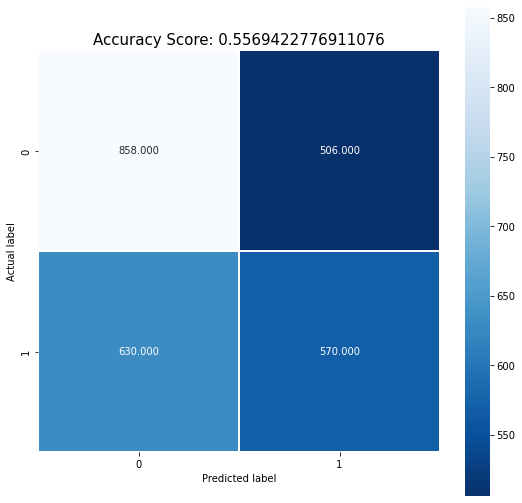

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

###ROC curve

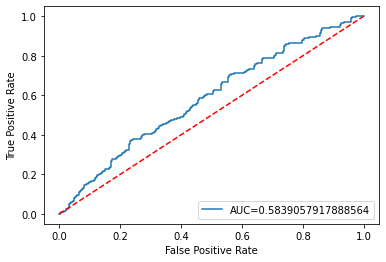

In [ ]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--') #baseline, completely randomized model
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Random Forest ( all variables)

Model accuracy:  0.828149300155521

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1341
           1       0.82      0.82      0.82      1231

    accuracy                           0.83      2572
   macro avg       0.83      0.83      0.83      2572
weighted avg       0.83      0.83      0.83      2572



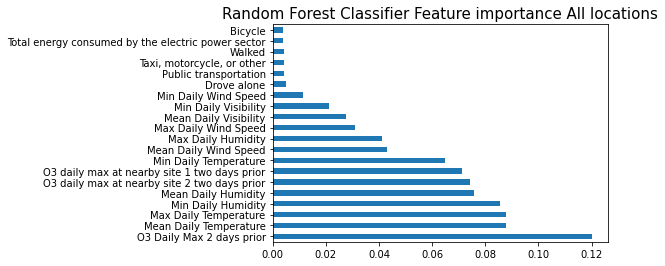

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Model accuracy: ',score)
print('')
print(sklearn.metrics.classification_report(y_test, y_pred))
###Feature importance based on Mean impurity reduction
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance All locations', size = 15)
plt.show()

###Confusion Matrix

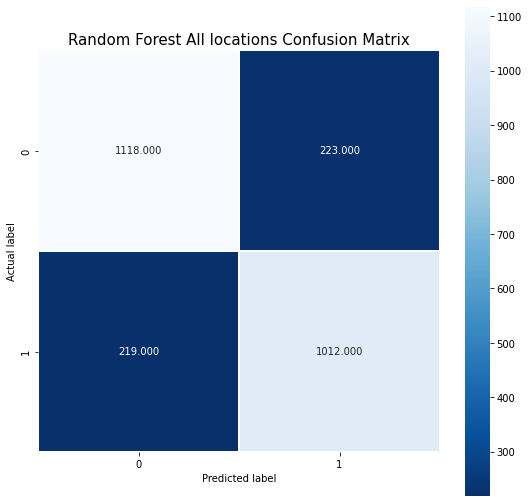

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest All locations Confusion Matrix'
plt.title(all_sample_title, size = 15);

###Feature importance based on feature perumation

In [ ]:
from sklearn.inspection import permutation_importance
import time

feature_names = [f"feature {i}" for i in range(X.shape[1])]
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 65.686 seconds


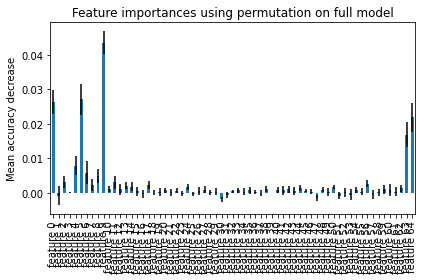

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

###Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
  learning_curve(estimator=clf, X=X_train,
                 y=y_train,
                 train_sizes=[0.3, 0.5, 0.6, 0.7, 0.8, 0.85],
                 cv=10)
  
plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='+', label='Validation accuracy')
plt.xlabel('Training samples')
plt.legend()

KeyboardInterrupt: ignored

###Validation Curve

In [ ]:
#Validation Curve
from sklearn.model_selection import validation_curve
param_range = [5,10,15,20,25,30,35,40,45,50,55,60]

train_scores, test_scores = validation_curve(estimator=clf, X=X_train,
                                             y=y_train, param_name='max_features', #this changes depending on which hyperparameter we are tuning
                                             param_range = param_range,
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(dpi=100)
plt.plot(param_range, train_mean, color='blue', marker='o',
         markersize=6, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, \
                 alpha=0.15)
plt.plot(param_range, test_mean, color='green', marker='+',
         markersize=6, label='Test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, \
                 alpha=0.15)
plt.xscale('log')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('max num of features considered at each split ') #this needs to be changed depending on what parameter we are tuning
plt.show()

##Random forest (Geographic & Meteorological variables)

Model accuracy:  0.8254276827371695

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1341
           1       0.81      0.84      0.82      1231

    accuracy                           0.83      2572
   macro avg       0.83      0.83      0.83      2572
weighted avg       0.83      0.83      0.83      2572



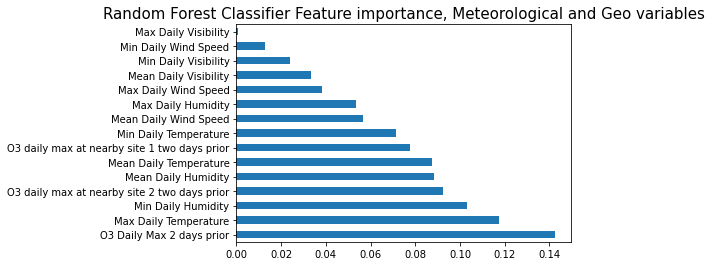

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GMX_train, GMy_train)
GMy_pred = clf.predict(GMX_test)
GMscore = metrics.accuracy_score(GMy_test, GMy_pred)
print('Model accuracy: ',GMscore)
print('')
print(sklearn.metrics.classification_report(GMy_test, GMy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GM_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Geo variables', size = 15)
plt.show()

##Random forest ( Geographic & Human-driven variables)

Model accuracy:  0.7048989113530326

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1341
           1       0.69      0.70      0.69      1231

    accuracy                           0.70      2572
   macro avg       0.70      0.70      0.70      2572
weighted avg       0.71      0.70      0.70      2572



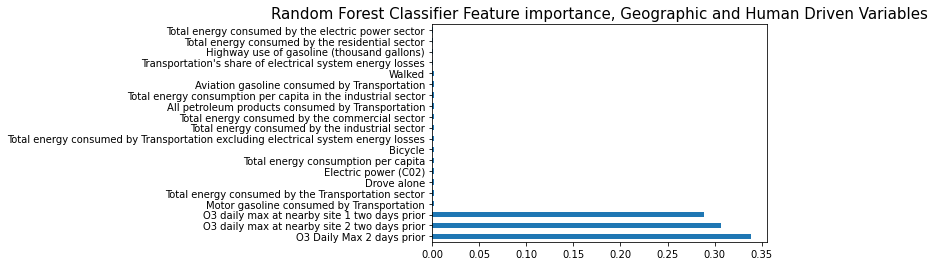

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GHX_train, GHy_train)
GHy_pred = clf.predict(GHX_test)
GHscore = metrics.accuracy_score(GHy_test, GHy_pred)
print('Model accuracy: ',GHscore)
print('')
print(sklearn.metrics.classification_report(GHy_test, GHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geographic and Human Driven Variables', size = 15)
plt.show()

##Random forest (Human-driven & Meteorological variables)

Model accuracy:  0.8094867807153966

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1341
           1       0.81      0.79      0.80      1231

    accuracy                           0.81      2572
   macro avg       0.81      0.81      0.81      2572
weighted avg       0.81      0.81      0.81      2572



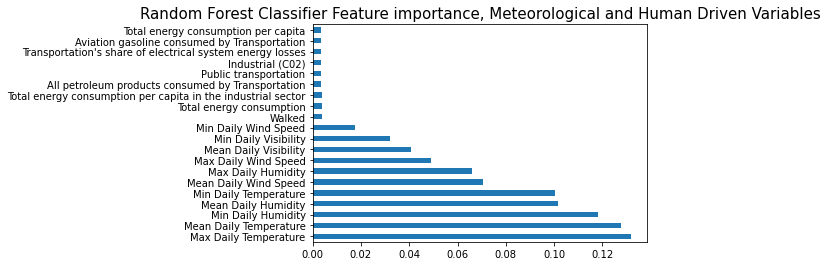

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MHX_train, MHy_train)
MHy_pred = clf.predict(MHX_test)
MHscore = metrics.accuracy_score(MHy_test, MHy_pred)
print('Model accuracy: ',MHscore)
print('')
print(sklearn.metrics.classification_report(MHy_test, MHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=MH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Human Driven Variables', size = 15)
plt.show()

##RF on Meteorological variables

Model accuracy:  0.7947122861586314

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1341
           1       0.78      0.79      0.79      1231

    accuracy                           0.79      2572
   macro avg       0.79      0.79      0.79      2572
weighted avg       0.79      0.79      0.79      2572



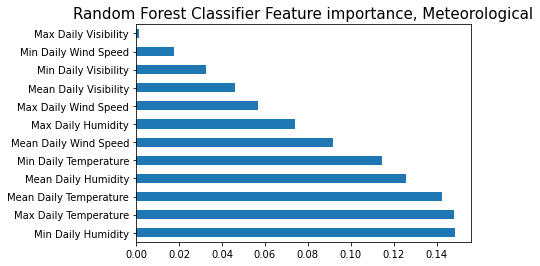

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MX_train, My_train)
My_pred = clf.predict(MX_test)
Mscore = metrics.accuracy_score(My_test, My_pred)
print('Model accuracy: ',Mscore)
print('')
print(sklearn.metrics.classification_report(My_test, My_pred))

feat_importances = pd.Series(clf.feature_importances_, index=M_X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological', size = 15)
plt.show()

##RF on Geographical variables

Model accuracy:  0.7045101088646968

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1341
           1       0.69      0.71      0.70      1231

    accuracy                           0.70      2572
   macro avg       0.70      0.70      0.70      2572
weighted avg       0.71      0.70      0.70      2572



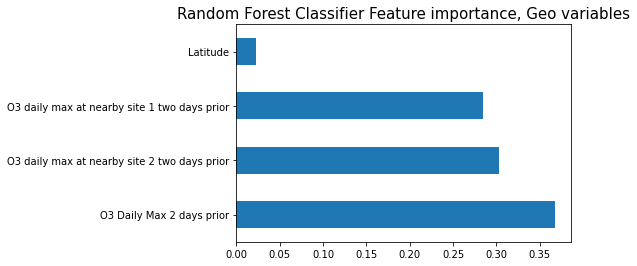

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GX_train, Gy_train)
Gy_pred = clf.predict(GX_test)
Gscore = metrics.accuracy_score(Gy_test, Gy_pred)
print('Model accuracy: ',Gscore)
print('')
print(sklearn.metrics.classification_report(Gy_test, Gy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=G_X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geo variables', size = 15)
plt.show()

##RF on Human-driven variables

Model accuracy:  0.5559875583203733

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      1341
           1       0.53      0.56      0.55      1231

    accuracy                           0.56      2572
   macro avg       0.56      0.56      0.56      2572
weighted avg       0.56      0.56      0.56      2572



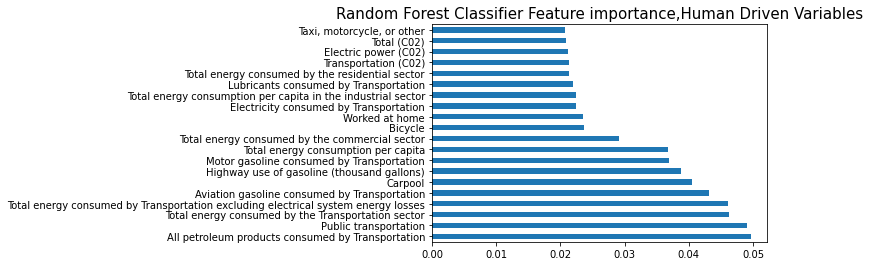

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(HX_train, Hy_train)
Hy_pred = clf.predict(HX_test)
Hscore = metrics.accuracy_score(Hy_test, Hy_pred)
print('Model accuracy: ',Hscore)
print('')
print(sklearn.metrics.classification_report(Hy_test, Hy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=H_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance,Human Driven Variables', size = 15)
plt.show()

##Summary of changes in Random Forest accuracy by leaving out subsets of variables

<function matplotlib.pyplot.show>

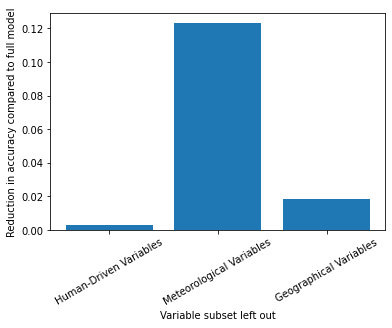

In [ ]:
ls1 = ['Human-Driven Variables', 'Meteorological Variables', 'Geographical Variables']
ls2 = [score-GMscore, score-GHscore,score-MHscore]

ls3= ['Human-Driven Variables', 'Meteorological Variables', 'Geographical Variables', "Full model"]
ls4 = [Hscore, Mscore, Gscore, score]


plt.bar(ls1,height=ls2)
plt.xlabel('Variable subset left out')
plt.ylabel("Reduction in accuracy compared to full model")
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show>

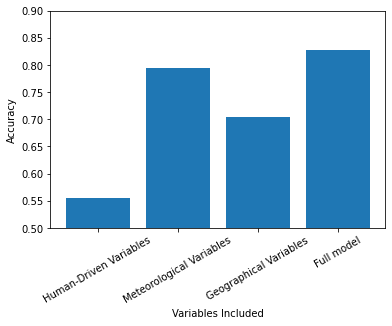

In [ ]:
plt.bar(ls3,height=ls4)
plt.xlabel("Variables Included")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.5,0.9)
plt.show

##Random Forest with tuned hyperparameters (all locations)

In [ ]:
clf = RandomForestClassifier(max_depth=12,  n_estimators=400, max_features = 35, bootstrap=False, min_samples_leaf=10, min_samples_split=12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Model accuracy: ',score)
print(sklearn.metrics.classification_report(y_test, y_pred))

Model accuracy:  0.8189189189189189
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1361
           1       0.80      0.83      0.81      1229

    accuracy                           0.82      2590
   macro avg       0.82      0.82      0.82      2590
weighted avg       0.82      0.82      0.82      2590



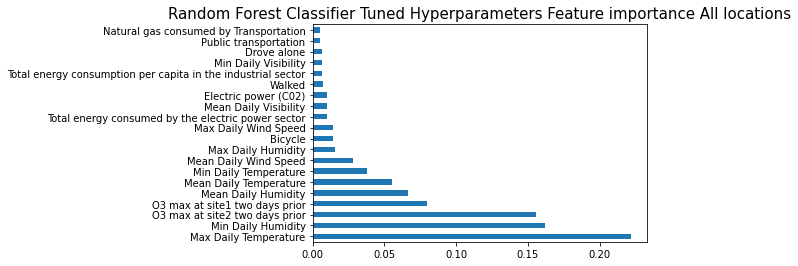

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Tuned Hyperparameters Feature importance All locations', size = 15)
plt.show()

##XGB classifier

In [ ]:


xgbModel = XGBClassifier(max_depth=12, learning_rate=0.05, n_estimators = 300)
xgbModel.fit(X_train, y_train)
xgbPredictions = xgbModel.predict(X_test)
xgbAccuracy = accuracy_score(y_test, xgbPredictions)

print('Model accuracy: ',xgbAccuracy)
print(sklearn.metrics.classification_report(y_test, xgbPredictions))

Model accuracy:  0.8242612752721618
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1341
           1       0.82      0.81      0.82      1231

    accuracy                           0.82      2572
   macro avg       0.82      0.82      0.82      2572
weighted avg       0.82      0.82      0.82      2572



##SVC with standard scaling pipeline

In [ ]:

scaler = preprocessing.StandardScaler().fit(X_train)
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
score = pipe.score(X_test, y_test)
print('Model accuracy: ',score)
print(sklearn.metrics.classification_report(y_test, y_pred))

Model accuracy:  0.823094867807154
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1341
           1       0.81      0.82      0.82      1231

    accuracy                           0.82      2572
   macro avg       0.82      0.82      0.82      2572
weighted avg       0.82      0.82      0.82      2572



##RF with standard scaling pipeline

In [ ]:

from sklearn import preprocessing

from sklearn.pipeline import Pipeline

scaler = preprocessing.StandardScaler().fit(X_train)
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('rf', RandomForestClassifier(n_estimators=400,max_features=35))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
score = pipe.score(X_test, y_test)
print('Model accuracy: ',score)
print(sklearn.metrics.classification_report(y_test, y_pred))
#note there is a slight improvement in accuracy here by scaling the variables

Model accuracy:  0.8262052877138414
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1341
           1       0.82      0.82      0.82      1231

    accuracy                           0.83      2572
   macro avg       0.83      0.83      0.83      2572
weighted avg       0.83      0.83      0.83      2572



#TERNARY CLASSIFICATION

#train/ test split + feature importances

In [ ]:
X = all_df.drop(['Date','State','Year',	'County Name','Address', 'Latitude', 'Longitude',
             'Event Type','O3 Daily Mean','O3 Daily Max', 'O3 HML','AQI','City Name'], axis = 1)
y = all_df['O3 HML']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Feature        Score
0                               Max Daily Temperature  2100.013493
64                     O3 max at site2 two days prior  1861.288693
63                     O3 max at site1 two days prior  1816.371242
4                              Mean Daily Temperature  1678.903818
8                               Min Daily Temperature  1101.670561
9                                  Min Daily Humidity   804.122308
5                                 Mean Daily Humidity   545.509878
7                               Mean Daily Visibility   320.471683
11                               Min Daily Visibility   262.243931
1                                  Max Daily Humidity   149.868025
38       Aviation gasoline consumed by Transportation   121.251992
57                Total energy consumption per capita   116.303205
59  Total energy consumption per capita in the ind...   107.273462
16                         Taxi, motorcycle, or other   102.52

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#G+M (leaves out human-driven factors)
GM_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'O3 max at site1 two days prior', 'O3 max at site2 two days prior']]
GM_y = all_df['O3 HML']

#GM_X

GMX_train, GMX_test, GMy_train, GMy_test = train_test_split(
    GM_X, GM_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(GM_X,GM_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GM_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                           Feature        Score
0            Max Daily Temperature  2100.013493
13  O3 max at site2 two days prior  1861.288693
12  O3 max at site1 two days prior  1816.371242
4           Mean Daily Temperature  1678.903818
8            Min Daily Temperature  1101.670561
9               Min Daily Humidity   804.122308
5              Mean Daily Humidity   545.509878
7            Mean Daily Visibility   320.471683
11            Min Daily Visibility   262.243931
1               Max Daily Humidity   149.868025
10            Min Daily Wind Speed    46.964804
6            Mean Daily Wind Speed    27.449553


In [ ]:
#G+H (leaves out meteorological factors)

GH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address','Latitude','Longitude',
             'Event Type','O3 Daily Mean','O3 Daily Max', 'O3 HML','AQI','City Name', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility', 'Max Daily Temperature', 'Max Daily Humidity'],axis=1)
GH_y = all_df['O3 HML']

GHX_train, GHX_test, GHy_train, GHy_test = train_test_split(
    GH_X, GH_y, test_size=0.2, random_state=13)

bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(GH_X,GH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(GH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                                              Feature        Score
52                     O3 max at site2 two days prior  1861.288693
51                     O3 max at site1 two days prior  1816.371242
26       Aviation gasoline consumed by Transportation   121.251992
45                Total energy consumption per capita   116.303205
47  Total energy consumption per capita in the ind...   107.273462
4                          Taxi, motorcycle, or other   102.520293
8           Highway vehicle-miles traveled (millions)    98.939383
32                Jet fuel consumed by Transportation    96.293048
37       Residual fuel oil consumed by Transportation    95.085021
40     Total energy consumed by the commercial sector    94.490687
20                            Business Establishments    92.732060
34          Motor gasoline consumed by Transportation    90.372675
25  All petroleum products consumed by Transportation    89.420538
7          Highway use of gasoline (thousand gallons)    89.38

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [27] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#M+H (leaves out geographic factors)

MH_X = all_df.drop(columns=['Date','State','Year',	'County Name','Address','Latitude','Longitude',
             'Event Type','O3 Daily Mean','O3 Daily Max', 'O3 HML','AQI','City Name', 'O3 max at site1 two days prior', 'O3 max at site2 two days prior'],axis=1)

MH_y = all_df['O3 HML']

MHX_train, MHX_test, MHy_train, MHy_test = train_test_split(
    MH_X, MH_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(MH_X,MH_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(MH_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature        Score
0                               Max Daily Temperature  2100.013493
4                              Mean Daily Temperature  1678.903818
8                               Min Daily Temperature  1101.670561
9                                  Min Daily Humidity   804.122308
5                                 Mean Daily Humidity   545.509878
7                               Mean Daily Visibility   320.471683
11                               Min Daily Visibility   262.243931
1                                  Max Daily Humidity   149.868025
38       Aviation gasoline consumed by Transportation   121.251992
57                Total energy consumption per capita   116.303205
59  Total energy consumption per capita in the ind...   107.273462
16                         Taxi, motorcycle, or other   102.520293
20          Highway vehicle-miles traveled (millions)    98.939383
44                Jet fuel consumed by Transportation    96.29

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
#Meteorological
M_X = all_df[[ 'Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility']]
M_y = all_df['O3 HML']


MX_train, MX_test, My_train, My_test = train_test_split(
    M_X, M_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=12)
fit = bestfeatures.fit(M_X,M_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(M_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 20 best features

                   Feature        Score
0    Max Daily Temperature  2100.013493
4   Mean Daily Temperature  1678.903818
8    Min Daily Temperature  1101.670561
9       Min Daily Humidity   804.122308
5      Mean Daily Humidity   545.509878
7    Mean Daily Visibility   320.471683
11    Min Daily Visibility   262.243931
1       Max Daily Humidity   149.868025
10    Min Daily Wind Speed    46.964804
6    Mean Daily Wind Speed    27.449553
2     Max Daily Wind Speed     9.484834
3     Max Daily Visibility     1.812294


In [ ]:
#Geographical
G_X = all_df[['O3 max at site1 two days prior', 'O3 max at site2 two days prior', 'Latitude', 'Longitude']]
G_y = all_df['O3 HML']


GX_train, GX_test, Gy_train, Gy_test = train_test_split(
    G_X, G_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=4)
fit = bestfeatures.fit(G_X,G_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(G_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 20 best features

                          Feature        Score
1  O3 max at site2 two days prior  1861.288693
0  O3 max at site1 two days prior  1816.371242
2                        Latitude   107.001597
3                       Longitude    13.502404


In [ ]:
#Human- Driven
H_X = all_df.drop(columns=['Max Daily Temperature', 'Max Daily Humidity', 'Max Daily Wind Speed', 'Max Daily Visibility',
       'Mean Daily Temperature', 'Mean Daily Humidity',
       'Mean Daily Wind Speed', 'Mean Daily Visibility',
       'Min Daily Temperature', 'Min Daily Humidity', 'Min Daily Wind Speed',
       'Min Daily Visibility','Date','State','Year',	'County Name','Address','Latitude','Longitude',
       'Event Type','O3 Daily Mean','O3 Daily Max', 'O3 HML','AQI','City Name', 'O3 max at site1 two days prior', 'O3 max at site2 two days prior'],axis=1)

H_y = all_df['O3 HML']

HX_train, HX_test, Hy_train, Hy_test = train_test_split(
    H_X, H_y, test_size=0.2, random_state=13)


bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(H_X,H_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(H_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best featuresMH_X

                                              Feature       Score
26       Aviation gasoline consumed by Transportation  121.251992
45                Total energy consumption per capita  116.303205
47  Total energy consumption per capita in the ind...  107.273462
4                          Taxi, motorcycle, or other  102.520293
8           Highway vehicle-miles traveled (millions)   98.939383
32                Jet fuel consumed by Transportation   96.293048
37       Residual fuel oil consumed by Transportation   95.085021
40     Total energy consumed by the commercial sector   94.490687
20                            Business Establishments   92.732060
34          Motor gasoline consumed by Transportation   90.372675
25  All petroleum products consumed by Transportation   89.420538
7          Highway use of gasoline (thousand gallons)   89.384275
38  Total energy consumed by Transportation exclud...   87.780166
39  Total energy consumed by the Transportation se...   87.504976
5         

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [27] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



##Random Forest (full)

Model accuracy:  0.6787644787644788

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       940
           1       0.62      0.67      0.64      1091
           2       0.70      0.60      0.65       559

    accuracy                           0.68      2590
   macro avg       0.69      0.67      0.68      2590
weighted avg       0.68      0.68      0.68      2590



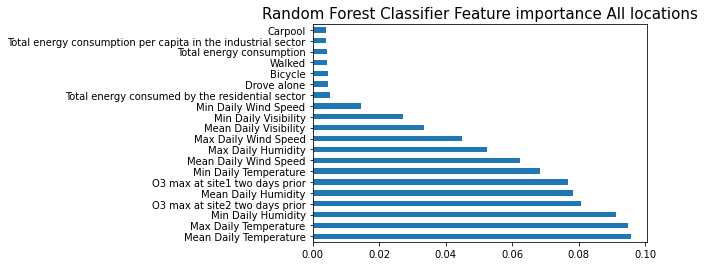

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Model accuracy: ',score)
print('')
print(sklearn.metrics.classification_report(y_test, y_pred))

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance All locations', size = 15)
plt.show()

##Random Forest (G+M)

Model accuracy:  0.6486486486486487

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       940
           1       0.59      0.62      0.61      1091
           2       0.62      0.57      0.59       559

    accuracy                           0.65      2590
   macro avg       0.65      0.64      0.64      2590
weighted avg       0.65      0.65      0.65      2590



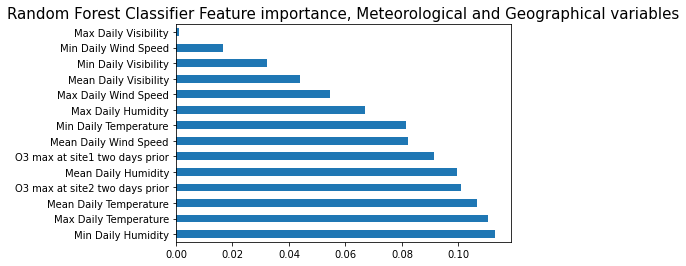

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GMX_train, GMy_train)
GMy_pred = clf.predict(GMX_test)
GMscore = metrics.accuracy_score(GMy_test, GMy_pred)
print('Model accuracy: ',GMscore)
print('')
print(sklearn.metrics.classification_report(GMy_test, GMy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GM_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Geographical variables', size = 15)
plt.show()

##Random Forest (G+H)

Model accuracy:  0.5146718146718147

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       940
           1       0.49      0.51      0.50      1091
           2       0.42      0.39      0.40       559

    accuracy                           0.51      2590
   macro avg       0.50      0.50      0.50      2590
weighted avg       0.51      0.51      0.51      2590



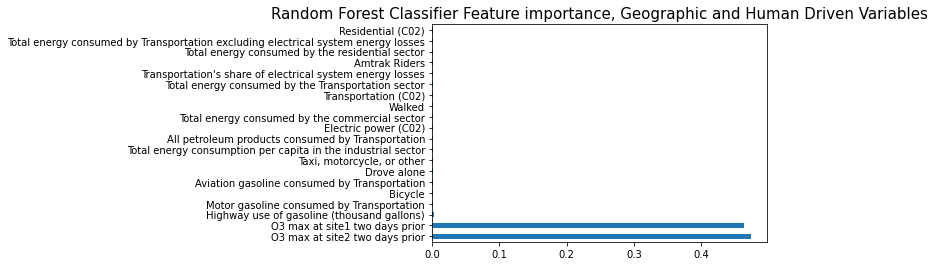

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GHX_train, GHy_train)
GHy_pred = clf.predict(GHX_test)
GHscore = metrics.accuracy_score(GHy_test, GHy_pred)
print('Model accuracy: ',GHscore)
print('')
print(sklearn.metrics.classification_report(GHy_test, GHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=GH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geographic and Human Driven Variables', size = 15)
plt.show()

##Random Forest (M+H)

Model accuracy:  0.6648648648648648

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       940
           1       0.61      0.65      0.63      1091
           2       0.68      0.60      0.64       559

    accuracy                           0.66      2590
   macro avg       0.67      0.66      0.66      2590
weighted avg       0.67      0.66      0.66      2590



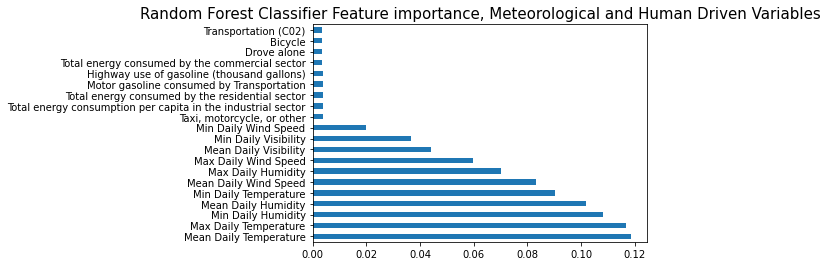

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MHX_train, MHy_train)
MHy_pred = clf.predict(MHX_test)
MHscore = metrics.accuracy_score(MHy_test, MHy_pred)
print('Model accuracy: ',MHscore)
print('')
print(sklearn.metrics.classification_report(MHy_test, MHy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=MH_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological and Human Driven Variables', size = 15)
plt.show()

##Random Forest (M)

Model accuracy:  0.6362934362934363

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       940
           1       0.58      0.60      0.59      1091
           2       0.61      0.59      0.60       559

    accuracy                           0.64      2590
   macro avg       0.64      0.63      0.63      2590
weighted avg       0.64      0.64      0.64      2590



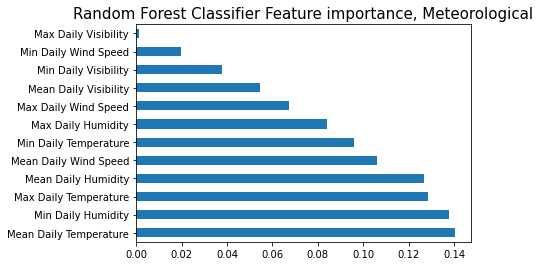

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(MX_train, My_train)
My_pred = clf.predict(MX_test)
Mscore = metrics.accuracy_score(My_test, My_pred)
print('Model accuracy: ',Mscore)
print('')
print(sklearn.metrics.classification_report(My_test, My_pred))

feat_importances = pd.Series(clf.feature_importances_, index=M_X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Meteorological', size = 15)
plt.show()

##Random Forest (G)

Model accuracy:  0.505019305019305

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       940
           1       0.48      0.50      0.49      1091
           2       0.39      0.37      0.38       559

    accuracy                           0.51      2590
   macro avg       0.49      0.49      0.49      2590
weighted avg       0.50      0.51      0.50      2590



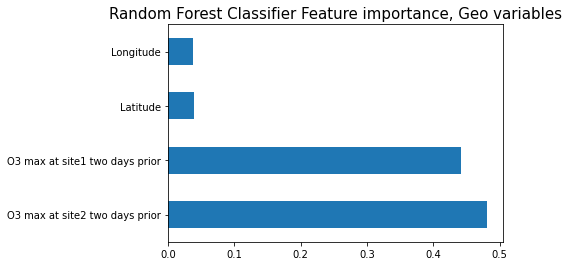

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(GX_train, Gy_train)
Gy_pred = clf.predict(GX_test)
Gscore = metrics.accuracy_score(Gy_test, Gy_pred)
print('Model accuracy: ',Gscore)
print('')
print(sklearn.metrics.classification_report(Gy_test, Gy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=G_X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance, Geo variables', size = 15)
plt.show()

##Random Forest (H)

Model accuracy:  0.47104247104247104

              precision    recall  f1-score   support

           0       0.46      0.45      0.45       940
           1       0.48      0.68      0.56      1091
           2       0.45      0.11      0.18       559

    accuracy                           0.47      2590
   macro avg       0.46      0.41      0.40      2590
weighted avg       0.47      0.47      0.44      2590



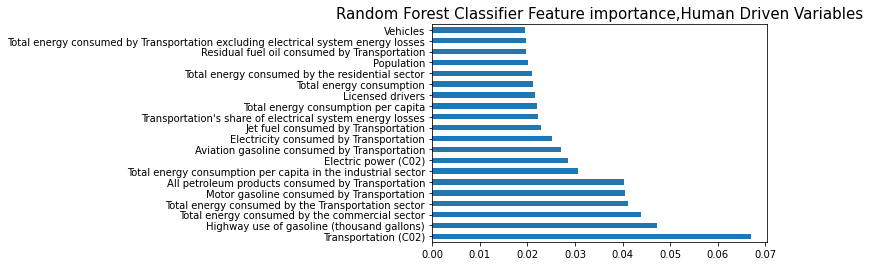

In [ ]:
clf = RandomForestClassifier(n_estimators = 140) 
clf.fit(HX_train, Hy_train)
Hy_pred = clf.predict(HX_test)
Hscore = metrics.accuracy_score(Hy_test, Hy_pred)
print('Model accuracy: ',Hscore)
print('')
print(sklearn.metrics.classification_report(Hy_test, Hy_pred))

feat_importances = pd.Series(clf.feature_importances_, index=H_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Random Forest Classifier Feature importance,Human Driven Variables', size = 15)
plt.show()

##Summary of results of ternary classification

#Extensions

##Hyperparameter tuning through gridsearch CV

In [ ]:
#How can we improve the accuracy of our machine learning models?
#By tuning hyperparameters of course
#To find the optimum hyperparameters we will bruteforce it with grid search CV
#Let's try tuning the hyperparameters of the Random Forestt since that was our best model
#attempt to tune 1 hyperparameter at a time, otherwise runtime exceeded
#This may take a while...
#best features, (so far)
#n_estimators: 300 
#max_features: 25
#max_depth: 30
#boostrap: True
#min_samples_leaf: 20 
#min_samples_split: 2


from sklearn.model_selection import GridSearchCV




#define a list of possible hyperparameter values, as well as our Regressor
max_depth = [15,30,45]
n_estimators = [100,300,600]
max_features = [10,25,35]
bootstrap = [True, False]
min_samples_leaf = [2,10,20]
min_samples_split = [2,5,10]
clf = RandomForestClassifier()
hyperParam = {'min_samples_split': min_samples_split}


#create the grid search
gsv = GridSearchCV(clf,hyperParam,cv=5,verbose=0,n_jobs=1)

gsv.fit(X, y)
#print the best maxdepth to use
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)

Best HyperParameter:  {'min_samples_split': 2}
0.6097700846020662
